# 数据清洗

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
df=pd.read_csv('shuju.csv')
df

,目标客户编号,品牌类型,a1,a2,a3,a4,a5,a6,a7,a8,...,B9,B10,B11,B12,B13,B14,B15,B16,B17,购买意愿
0,1,2,753.04,87.65,81.56,85.61,85.63,85.81,82.35,84.77,...,6,14,2,3,19.0,11,10,30,5,0
1,2,3,88.92,82.95,85.17,85.19,77.76,83.60,82.15,88.87,...,6,5,4,4,18.0,10,8,0,30,0
2,3,3,95.05,93.33,77.66,93.03,88.87,94.17,95.60,95.88,...,4,9,5,2,24.0,10,17,0,0,0
3,4,3,71.15,76.79,66.69,81.93,66.65,77.77,77.58,76.99,...,6,10,4,7,27.0,10,10,18,25,0
4,5,3,70.57,71.65,70.44,74.03,66.65,66.34,62.09,74.44,...,6,13,4,2,25.0,15,15,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1959,1960,2,71.36,75.37,70.44,77.77,68.43,75.03,75.48,70.33,...,5,6,3,5,25.0,11,20,0,0,0
1960,1961,2,99.04,99.03,99.03,99.98,99.98,99.99,99.99,99.98,...,5,14,7,9,29.0,9,9,30,20,0
1961,1962,2,90.77,91.92,92.67,96.72,94.96,97.25,95.60,95.88,...,6,8,4,5,39.0,20,17,0,30,0
1962,1963,2,82.43,88.51,74.05,93.03,76.46,94.70,91.16,95.88,...,6,8,4,4,21.0,12,7,20,20,0


In [2]:
print(df.loc[df.a1>100].index)
print(df.loc[df.a3>100].index)
print(df.loc[df.a5>100].index)
print(df.loc[df.B17>100].index)

Int64Index([0], dtype='int64')
Int64Index([1963], dtype='int64')
Int64Index([479], dtype='int64')
Int64Index([222], dtype='int64')


In [3]:
df=df.drop(df.index[[0,222,479,1963]])   #删除异常行
df.loc[df['B7']=='#NULL!','B7']=0    #将空值变为0
df.B7.value_counts()                 #查看B7列种类及其数量

1    1227
0     499
2     228
3       6
Name: B7, dtype: int64

In [4]:
df.B8

1       1992
2       1988
3       1986
4       1983
5       1985
        ... 
1958    1992
1959    1987
1960    1984
1961    1990
1962    1987
Name: B8, Length: 1960, dtype: int64

In [5]:
df.B8=2021-df.B8.values    #年龄转换
df.B8

1       29
2       33
3       35
4       38
5       36
        ..
1958    29
1959    34
1960    37
1961    31
1962    34
Name: B8, Length: 1960, dtype: int64

In [6]:
df[df.columns[0]]

1          2
2          3
3          4
4          5
5          6
        ... 
1958    1959
1959    1960
1960    1961
1961    1962
1962    1963
Name: 目标客户编号, Length: 1960, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1960 entries, 1 to 1962
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   目标客户编号  1960 non-null   int64  
 1   品牌类型    1960 non-null   int64  
 2   a1      1960 non-null   float64
 3   a2      1960 non-null   float64
 4   a3      1960 non-null   float64
 5   a4      1960 non-null   float64
 6   a5      1960 non-null   float64
 7   a6      1960 non-null   float64
 8   a7      1960 non-null   float64
 9   a8      1960 non-null   float64
 10  B1      1960 non-null   int64  
 11  B2      1960 non-null   int64  
 12  B3      1960 non-null   int64  
 13  B4      1960 non-null   int64  
 14  B5      1960 non-null   int64  
 15  B6      1960 non-null   int64  
 16  B7      1960 non-null   object 
 17  B8      1960 non-null   int64  
 18  B9      1960 non-null   int64  
 19  B10     1960 non-null   int64  
 20  B11     1960 non-null   int64  
 21  B12     1960 non-null   int64  
 22  

In [8]:
df.B7 = pd.Categorical(df.B7).codes   #类型转换

In [9]:
df.info()    #类型正常

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1960 entries, 1 to 1962
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   目标客户编号  1960 non-null   int64  
 1   品牌类型    1960 non-null   int64  
 2   a1      1960 non-null   float64
 3   a2      1960 non-null   float64
 4   a3      1960 non-null   float64
 5   a4      1960 non-null   float64
 6   a5      1960 non-null   float64
 7   a6      1960 non-null   float64
 8   a7      1960 non-null   float64
 9   a8      1960 non-null   float64
 10  B1      1960 non-null   int64  
 11  B2      1960 non-null   int64  
 12  B3      1960 non-null   int64  
 13  B4      1960 non-null   int64  
 14  B5      1960 non-null   int64  
 15  B6      1960 non-null   int64  
 16  B7      1960 non-null   int8   
 17  B8      1960 non-null   int64  
 18  B9      1960 non-null   int64  
 19  B10     1960 non-null   int64  
 20  B11     1960 non-null   int64  
 21  B12     1960 non-null   int64  
 22  

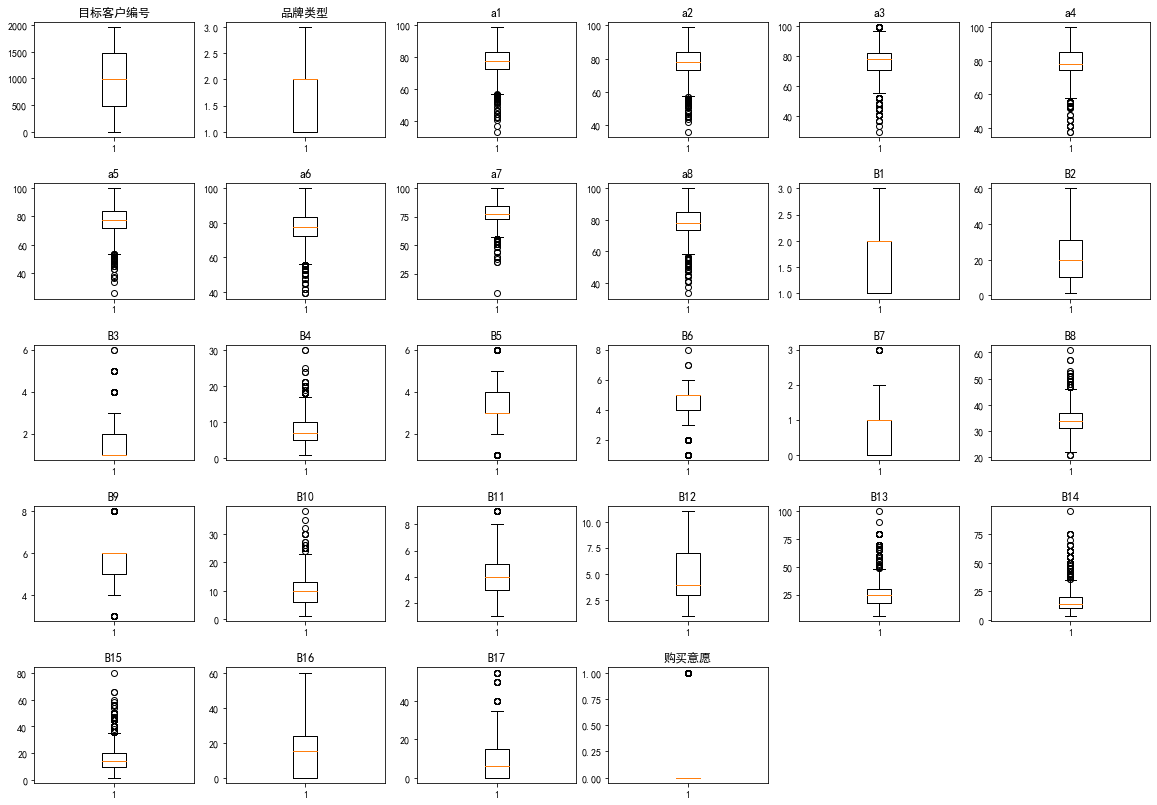

In [10]:
plt.figure(figsize=(20,14))
for i in range(len(df.columns)):
    plt.subplot(5,6,i+1)
    plt.title(df.columns[i])
    plt.boxplot(df[df.columns[i]])
plt.subplots_adjust(hspace=0.4)
plt.show()

In [11]:
df = df.drop(df[df['a7']<8].index)
df = df.drop(df[df['B4']>25].index)
df = df.drop(df[df['B10']>30].index)
df = df.drop(df[df['B13']>80].index)
df = df.drop(df[df['B14']>80].index)
df = df.drop(df[df['B15']>70].index)
df

,目标客户编号,品牌类型,a1,a2,a3,a4,a5,a6,a7,a8,...,B9,B10,B11,B12,B13,B14,B15,B16,B17,购买意愿
1,2,3,88.92,82.95,85.17,85.19,77.76,83.60,82.15,88.87,...,6,5,4,4,18.0,10,8,0,30,0
2,3,3,95.05,93.33,77.66,93.03,88.87,94.17,95.60,95.88,...,4,9,5,2,24.0,10,17,0,0,0
3,4,3,71.15,76.79,66.69,81.93,66.65,77.77,77.58,76.99,...,6,10,4,7,27.0,10,10,18,25,0
4,5,3,70.57,71.65,70.44,74.03,66.65,66.34,62.09,74.44,...,6,13,4,2,25.0,15,15,0,0,0
5,6,3,68.73,70.96,70.44,71.24,69.90,72.49,71.24,70.76,...,6,9,3,2,15.0,10,7,30,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958,1959,2,55.58,55.58,55.58,55.55,53.77,55.56,55.56,55.55,...,6,6,4,4,30.0,20,10,50,0,0
1959,1960,2,71.36,75.37,70.44,77.77,68.43,75.03,75.48,70.33,...,5,6,3,5,25.0,11,20,0,0,0
1960,1961,2,99.04,99.03,99.03,99.98,99.98,99.99,99.99,99.98,...,5,14,7,9,29.0,9,9,30,20,0
1961,1962,2,90.77,91.92,92.67,96.72,94.96,97.25,95.60,95.88,...,6,8,4,5,39.0,20,17,0,30,0


In [12]:
df.to_csv('data.csv')

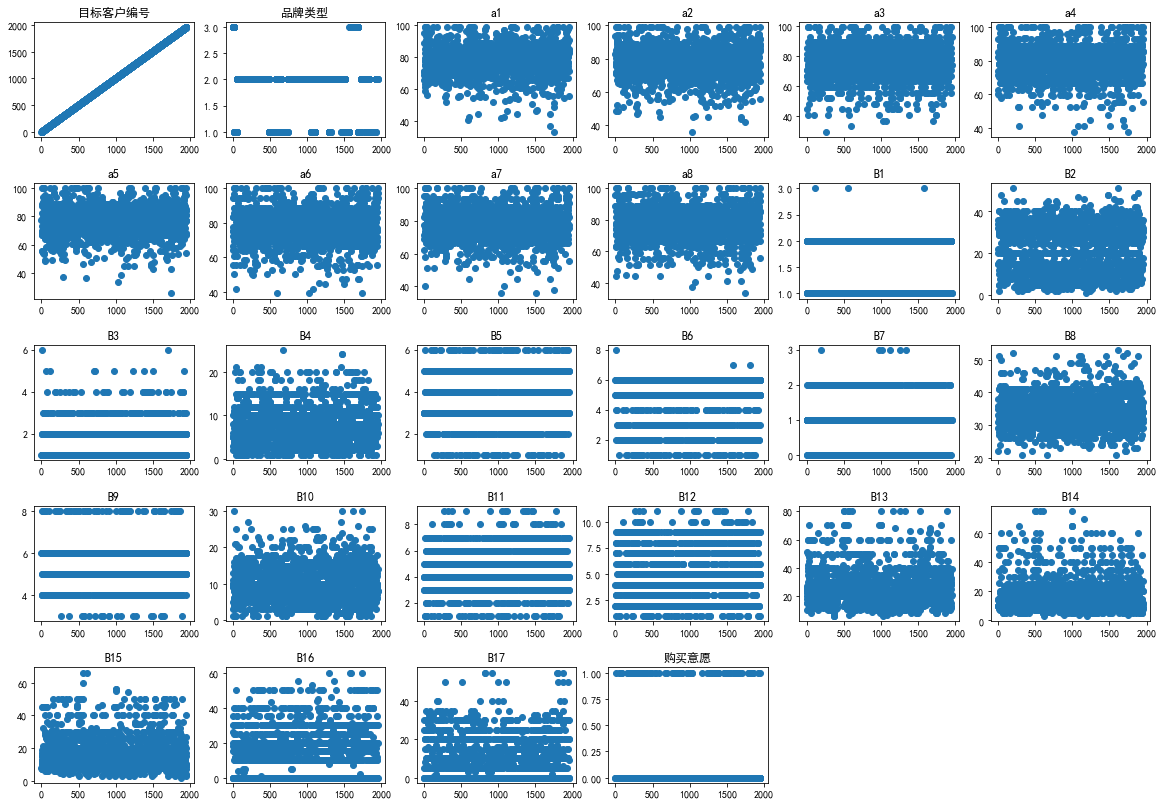

In [13]:
plt.figure(figsize=(20,14))
for i in range(len(df.columns)):
    plt.subplot(5,6,i+1)
    plt.title(df.columns[i])
    plt.scatter(range(0,len(df)),df[df.columns[i]])
plt.subplots_adjust(hspace=0.4)
plt.show()

In [14]:
from scipy.stats import shapiro
for i in range(len(df.columns)):
    stat, p = shapiro(df.iloc[:,i])
    print("stat为：%f" %stat,"p值为：%f" %p)

stat为：0.954973 p值为：0.000000
stat为：0.724473 p值为：0.000000
stat为：0.981697 p值为：0.000000
stat为：0.981232 p值为：0.000000
stat为：0.969621 p值为：0.000000
stat为：0.972324 p值为：0.000000
stat为：0.972912 p值为：0.000000
stat为：0.979462 p值为：0.000000
stat为：0.979973 p值为：0.000000
stat为：0.974578 p值为：0.000000
stat为：0.588133 p值为：0.000000
stat为：0.942437 p值为：0.000000
stat为：0.732253 p值为：0.000000
stat为：0.947840 p值为：0.000000
stat为：0.870392 p值为：0.000000
stat为：0.799629 p值为：0.000000
stat为：0.766904 p值为：0.000000
stat为：0.982286 p值为：0.000000
stat为：0.818305 p值为：0.000000
stat为：0.967539 p值为：0.000000
stat为：0.943966 p值为：0.000000
stat为：0.925078 p值为：0.000000
stat为：0.905996 p值为：0.000000
stat为：0.787903 p值为：0.000000
stat为：0.858293 p值为：0.000000
stat为：0.904637 p值为：0.000000
stat为：0.837115 p值为：0.000000
stat为：0.224379 p值为：0.000000


In [15]:
df1=df[df['品牌类型'].isin([1])]
df2=df[df['品牌类型'].isin([2])]
df3=df[df['品牌类型'].isin([3])]
df1.to_csv('pinpai1.csv')
df2.to_csv('pinpai2.csv')
df3.to_csv('pinpai3.csv')

In [16]:
df1.describe()

,目标客户编号,品牌类型,a1,a2,a3,a4,a5,a6,a7,a8,...,B9,B10,B11,B12,B13,B14,B15,B16,B17,购买意愿
count,553.000000,553.0,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,...,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000
mean,1122.421338,1.0,77.971953,78.658734,75.986998,79.382152,77.850705,78.213255,78.623309,78.265461,...,5.529837,10.068716,4.385172,4.721519,28.742532,17.079566,16.504521,15.054250,10.878843,0.039783
std,586.756950,0.0,9.350508,9.062119,10.457352,9.248063,9.476992,9.475114,9.433483,10.039327,...,0.842440,4.814567,1.544602,2.455810,13.161148,11.116519,10.385699,13.122084,11.551467,0.195626
min,21.000000,1.0,37.040000,43.400000,37.090000,40.700000,38.110000,41.570000,39.860000,40.330000,...,3.000000,1.000000,1.000000,1.000000,7.000000,3.000000,2.000000,0.000000,0.000000,0.000000
25%,614.000000,1.0,72.410000,73.540000,70.440000,74.080000,72.750000,72.490000,73.200000,73.660000,...,5.000000,7.000000,3.000000,2.000000,20.000000,10.000000,10.000000,0.000000,0.000000,0.000000
50%,1113.000000,1.0,77.810000,78.560000,77.810000,78.190000,77.760000,77.770000,77.770000,77.760000,...,6.000000,10.000000,4.000000,4.000000,26.000000,14.000000,14.000000,15.000000,8.000000,0.000000
75%,1707.000000,1.0,83.520000,84.650000,81.560000,85.190000,83.850000,83.600000,84.440000,84.770000,...,6.000000,13.000000,5.000000,7.000000,35.000000,20.000000,20.000000,20.000000,20.000000,0.000000
max,1935.000000,1.0,99.040000,99.030000,99.030000,99.980000,99.980000,99.990000,99.990000,99.980000,...,8.000000,30.000000,9.000000,11.000000,80.000000,75.000000,66.000000,60.000000,55.000000,1.000000


In [17]:
df2.describe()

,目标客户编号,品牌类型,a1,a2,a3,a4,a5,a6,a7,a8,...,B9,B10,B11,B12,B13,B14,B15,B16,B17,购买意愿
count,1266.000000,1266.0,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,...,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000
mean,877.963665,2.0,77.951019,77.916983,75.935253,78.639179,76.943681,77.756106,77.804700,77.274131,...,5.437599,9.964455,4.455766,4.966035,25.230846,16.001580,15.992891,15.229068,8.862559,0.051343
std,521.149825,0.0,8.610740,8.971193,10.404798,8.963715,9.400115,9.214635,8.874296,9.256905,...,0.846089,4.743158,1.553785,2.545327,11.581320,10.399453,9.356063,13.062076,10.119604,0.220783
min,60.000000,2.0,33.160000,35.770000,29.590000,37.480000,25.230000,39.150000,35.620000,33.320000,...,3.000000,1.000000,1.000000,1.000000,6.000000,3.000000,3.000000,0.000000,0.000000,0.000000
25%,378.250000,2.0,73.150000,72.780000,70.440000,74.080000,71.510000,72.490000,73.200000,73.660000,...,5.000000,6.000000,4.000000,3.000000,17.000000,10.000000,10.000000,0.000000,0.000000,0.000000
50%,905.500000,2.0,77.810000,77.800000,77.810000,77.770000,77.760000,77.770000,77.770000,77.760000,...,6.000000,9.000000,4.000000,4.000000,23.000000,13.000000,13.500000,15.000000,6.000000,0.000000
75%,1262.750000,2.0,83.307500,83.890000,81.560000,85.190000,83.577500,83.600000,84.290000,82.220000,...,6.000000,13.000000,5.000000,7.000000,30.000000,20.000000,20.000000,24.000000,15.000000,0.000000
max,1963.000000,2.0,99.040000,99.030000,99.030000,99.980000,99.980000,99.990000,99.990000,99.980000,...,8.000000,30.000000,9.000000,11.000000,80.000000,75.000000,56.000000,60.000000,55.000000,1.000000


In [18]:
df3.describe()

,目标客户编号,品牌类型,a1,a2,a3,a4,a5,a6,a7,a8,...,B9,B10,B11,B12,B13,B14,B15,B16,B17,购买意愿
count,134.000000,134.0,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,...,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,1408.947761,3.0,77.282015,77.522313,74.796194,78.072761,76.038582,77.280448,77.796119,77.459403,...,5.522388,10.552239,4.231343,4.753731,31.761194,18.850746,19.186567,16.276119,8.843284,0.082090
std,571.200626,0.0,9.620477,9.568389,10.711513,10.054375,9.619414,9.963155,9.518311,10.334403,...,0.955525,5.351645,1.540990,2.599701,14.748100,11.170926,11.603842,13.748762,9.399132,0.275531
min,2.000000,3.0,55.580000,48.150000,40.700000,44.430000,50.530000,50.590000,40.060000,44.430000,...,3.000000,1.000000,1.000000,1.000000,10.000000,5.000000,6.000000,0.000000,0.000000,0.000000
25%,1597.250000,3.0,70.330000,71.860000,66.690000,73.610000,69.900000,71.950000,73.340000,70.760000,...,5.000000,7.000000,3.000000,2.000000,20.000000,10.000000,10.000000,0.000000,0.000000,0.000000
50%,1630.500000,3.0,77.810000,77.800000,77.660000,77.770000,77.760000,77.770000,77.770000,77.760000,...,6.000000,10.000000,4.000000,4.000000,30.000000,15.000000,15.000000,18.000000,6.500000,0.000000
75%,1663.750000,3.0,84.320000,83.737500,81.560000,84.720000,82.780000,83.600000,84.440000,84.770000,...,6.000000,14.000000,5.000000,7.000000,40.000000,23.750000,24.000000,25.000000,15.000000,0.000000
max,1697.000000,3.0,99.040000,99.030000,99.030000,99.980000,99.980000,99.990000,99.990000,99.980000,...,8.000000,30.000000,8.000000,10.000000,68.000000,55.000000,50.000000,60.000000,33.000000,1.000000


# 第一问：层次分析法

In [19]:
class AHP:
    def __init__(self, criteria, b):
        "一致性指标"
        self.RI = (0, 0, 0.58, 0.9, 1.12, 1.24, 1.32, 1.41, 1.45, 1.49)
        self.criteria = criteria
        self.num_criteria = criteria.shape[0]
    def cal_weights(self, input_matrix):
        input_matrix = np.array(input_matrix)
        "求矩阵维度"
        n, n1 = input_matrix.shape
        "求特征值与特征向量"
        eigenvalues, eigenvectors = np.linalg.eig(input_matrix)
        "求最大特征值"
        max_idx = np.argmax(eigenvalues)
        max_eigen = eigenvalues[max_idx].real
        eigen = eigenvectors[:, max_idx].real
        eigen = eigen / eigen.sum()
        CI = (max_eigen - n) / (n - 1)
        CR = CI / self.RI[n-1]
        return max_eigen, CR, eigen, CI
    def run(self):
        max_eigen, CR, criteria_eigen1, CI = self.cal_weights(self.criteria)
        print('准则层：最大特征值{:<5f},CR={:<5f},检验{}通过'.format(max_eigen, CR, '' if CR < 0.1 else '不'))
        print('准则层权重={}\n'.format(criteria_eigen1))
if __name__ == '__main__':
    "准则层判断矩阵"
    criteria = np.array([[1, 1/3, 2, 1/4, 1, 2,1/3,2],
                         [3, 1, 4, 1/2, 3, 2,1,2],
                         [1/2, 1/4, 1, 1/5, 1/2, 1/3,1/4,1/3],
                       [4, 2, 5, 1, 4, 3,2,3],
                         [1, 1/3, 2, 1/4, 1, 1/2,1/3,1/2],
                         [1/2, 1/2, 3, 1/3, 2, 1,1/2,1],
                         [3,1,4,1/2,3,2,1,2],
                         [1/2,1/2,3,1/3,2,1,1/2,1]])
    "方案层判断矩阵"
    a = AHP(criteria,_).run()

准则层：最大特征值8.287619,CR=0.029141,检验通过
准则层权重=[0.09286919 0.17602846 0.03835986 0.27980921 0.06103867 0.08793308
 0.17602846 0.08793308]



In [20]:
weight1=np.array([0.09286919,0.17602846,0.03835986,0.27980921,0.06103867,0.08793308,0.17602846,0.08793308])
weight1

array([0.09286919, 0.17602846, 0.03835986, 0.27980921, 0.06103867,
       0.08793308, 0.17602846, 0.08793308])

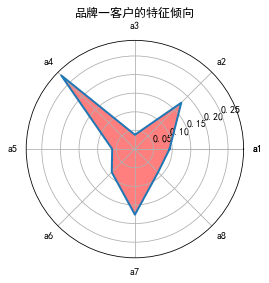

In [21]:
#雷达图
labels=np.array(['a1','a2','a3','a4','a5','a6','a7','a8'])
len=8
data=weight1
angles=np.linspace(0,2*np.pi,len,endpoint=False)
data=np.concatenate((data,[data[0]]))
angles=np.concatenate((angles,[angles[0]]))
labels=np.concatenate((labels,[labels[0]]))
plt.polar(angles,data,linewidth=2)
plt.thetagrids(angles*180/np.pi,labels)
plt.fill(angles,data,'r',alpha=0.5)
plt.title('品牌一客户的特征倾向')
plt.show()

In [22]:
class AHP:
    def __init__(self, criteria, b):
        "一致性指标"
        self.RI = (0, 0, 0.58, 0.9, 1.12, 1.24, 1.32, 1.41, 1.45, 1.49)
        self.criteria = criteria
        self.num_criteria = criteria.shape[0]
    def cal_weights(self, input_matrix):
        input_matrix = np.array(input_matrix)
        "求矩阵维度"
        n, n1 = input_matrix.shape
        "求特征值与特征向量"
        eigenvalues, eigenvectors = np.linalg.eig(input_matrix)
        "求最大特征值"
        max_idx = np.argmax(eigenvalues)
        max_eigen = eigenvalues[max_idx].real
        eigen = eigenvectors[:, max_idx].real
        eigen = eigen / eigen.sum()
        CI = (max_eigen - n) / (n - 1)
        CR = CI / self.RI[n-1]
        return max_eigen, CR, eigen, CI
    def run(self):
        max_eigen, CR, criteria_eigen1, CI = self.cal_weights(self.criteria)
        print('准则层：最大特征值{:<5f},CR={:<5f},检验{}通过'.format(max_eigen, CR, '' if CR < 0.1 else '不'))
        print('准则层权重={}\n'.format(criteria_eigen1))
if __name__ == '__main__':
    "准则层判断矩阵"
    criteria = np.array([[1, 1, 5, 1/2, 4, 2,2,3],
                         [1, 1, 5, 1/2, 4, 2,2,3],
                         [1/5, 1/5, 1, 1/6, 1/2, 1/4,1/4,1/3],
                       [2, 2, 6, 1, 5, 3,3,4],
                         [1/4, 1/4, 2, 1/5, 1, 1/3,1/3,1/2],
                         [1/2, 1/2, 4, 1/3, 3, 1,1,2],
                         [1/2, 1/2, 4, 1/3, 3, 1,1,2],
                         [1/3,1/3,3,1/4,2,1/2,1/2,1]])
    "方案层判断矩阵"
    a = AHP(criteria,_).run()

准则层：最大特征值8.138978,CR=0.014081,检验通过
准则层权重=[0.17937292 0.17937292 0.03043154 0.28474575 0.0438065  0.10770066
 0.10770066 0.06686905]



In [23]:
weight2=np.array([0.17937292,0.17937292,0.03043154,0.28474575,0.0438065,0.10770066,0.10770066,0.06686905])
weight2

array([0.17937292, 0.17937292, 0.03043154, 0.28474575, 0.0438065 ,
       0.10770066, 0.10770066, 0.06686905])

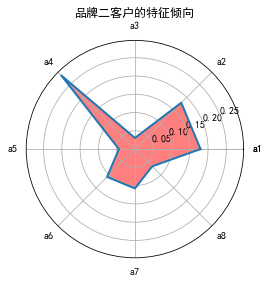

In [24]:
#雷达图
labels=np.array(['a1','a2','a3','a4','a5','a6','a7','a8'])
len=8
data=weight2
angles=np.linspace(0,2*np.pi,len,endpoint=False)
data=np.concatenate((data,[data[0]]))
angles=np.concatenate((angles,[angles[0]]))
labels=np.concatenate((labels,[labels[0]]))
plt.polar(angles,data,linewidth=2)
plt.thetagrids(angles*180/np.pi,labels)
plt.fill(angles,data,'r',alpha=0.5)
plt.title('品牌二客户的特征倾向')
plt.show()

In [25]:
class AHP:
    def __init__(self, criteria, b):
        "一致性指标"
        self.RI = (0, 0, 0.58, 0.9, 1.12, 1.24, 1.32, 1.41, 1.45, 1.49)
        self.criteria = criteria
        self.num_criteria = criteria.shape[0]
    def cal_weights(self, input_matrix):
        input_matrix = np.array(input_matrix)
        "求矩阵维度"
        n, n1 = input_matrix.shape
        "求特征值与特征向量"
        eigenvalues, eigenvectors = np.linalg.eig(input_matrix)
        "求最大特征值"
        max_idx = np.argmax(eigenvalues)
        max_eigen = eigenvalues[max_idx].real
        eigen = eigenvectors[:, max_idx].real
        eigen = eigen / eigen.sum()
        CI = (max_eigen - n) / (n - 1)
        CR = CI / self.RI[n-1]
        return max_eigen, CR, eigen, CI
    def run(self):
        max_eigen, CR, criteria_eigen1, CI = self.cal_weights(self.criteria)
        print('准则层：最大特征值{:<5f},CR={:<5f},检验{}通过'.format(max_eigen, CR, '' if CR < 0.1 else '不'))
        print('准则层权重={}\n'.format(criteria_eigen1))
if __name__ == '__main__':
    "准则层判断矩阵"
    criteria = np.array([[1, 1/2, 3, 1/4, 2, 1,1/3,1/2],
                         [2, 1, 4, 1/3, 3, 2,1/2,1],
                         [1/3, 1/4, 1, 1/6, 1/2, 1/3,1/5,1/4],
                       [4, 3, 6, 1, 5, 4,2,3],
                         [1/2, 1/3, 2, 1/5, 1, 1/2,1/4,1/3],
                         [1, 1/2, 3, 1/4, 2, 1,1/3,1/2],
                         [3, 2, 5, 1/2, 4, 3,1,2],
                         [2,1,4,1/3,3,2,1/2,1]])
    "方案层判断矩阵"
    a = AHP(criteria,_).run()

准则层：最大特征值8.138630,CR=0.014046,检验通过
准则层权重=[0.07565748 0.12701945 0.03226396 0.30943702 0.04736856 0.07565748
 0.2055766  0.12701945]



In [26]:
weight3=np.array([0.07565748,0.12701945,0.03226396,0.30943702,0.04736856,0.07565748,0.2055766,0.12701945])
weight3

array([0.07565748, 0.12701945, 0.03226396, 0.30943702, 0.04736856,
       0.07565748, 0.2055766 , 0.12701945])

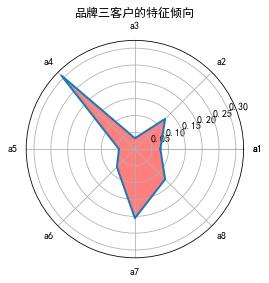

In [27]:
#雷达图
labels=np.array(['a1','a2','a3','a4','a5','a6','a7','a8'])
len=8
data=weight3
angles=np.linspace(0,2*np.pi,len,endpoint=False)
data=np.concatenate((data,[data[0]]))
angles=np.concatenate((angles,[angles[0]]))
labels=np.concatenate((labels,[labels[0]]))
plt.polar(angles,data,linewidth=2)
plt.thetagrids(angles*180/np.pi,labels)
plt.fill(angles,data,'r',alpha=0.5)
plt.title('品牌三客户的特征倾向')
plt.show()

# 满意度分数的求解

In [28]:
#品牌一
mean1=df1.mean()[2:10]
mean1=pd.Series(mean1)
index_=mean1.index
weight1=pd.Series(weight1,index=index_)
d1=pd.concat((mean1,weight1),axis=1,ignore_index=True)#形成一个Dataframe
print('品牌一的得分:',sum(d1.iloc[:,0]*d1.iloc[:,1]))

品牌一的得分: 78.56557479220325


In [29]:
#品牌二
mean2=df2.mean()[2:10]
mean2=pd.Series(mean2)
index_=mean2.index
weight2=pd.Series(weight2,index=index_)
d2=pd.concat((mean2,weight2),axis=1,ignore_index=True)#形成一个Dataframe
print('品牌二的得分:',sum(d2.iloc[:,0]*d2.iloc[:,1]))

品牌二的得分: 77.95337966248366


In [30]:
#品牌三
mean3=df3.mean()[2:10]
mean3=pd.Series(mean3)
index_=mean3.index
weight3=pd.Series(weight3,index=index_)
d3=pd.concat((mean3,weight3),axis=1,ignore_index=True)#形成一个Dataframe
print('品牌三的得分:',sum(d3.iloc[:,0]*d3.iloc[:,1]))

品牌三的得分: 77.54622264638581


# 熵权法确定权重

In [31]:
import pandas as pd
import numpy as np
import math
from numpy import array
df = pd.read_csv('pinpai1.csv')
df=df.iloc[:,3:11]
print(df)
#df.dropna()
# 定义熵值法函数
def cal_weight(x):
    #熵值法计算变量的权重
    # 标准化
    x = x.apply(lambda x: ((x - np.min(x)) / (np.max(x) - np.min(x))))
    # 求k
    rows = x.index.size  # 行
    cols = x.columns.size  # 列
    k = 1.0 / math.log(rows)
    lnf = [[None] * cols for i in range(rows)]
    # 矩阵计算--
    # 信息熵
    # p=array(p)
    x = array(x)
    lnf = [[None] * cols for i in range(rows)]
    lnf = array(lnf)
    for i in range(0, rows):
        for j in range(0, cols):
            if x[i][j] == 0:
                lnfij = 0.0
            else:
                p = x[i][j] / x.sum(axis=0)[j]
                lnfij = math.log(p) * p * (-k)
            lnf[i][j] = lnfij
    lnf = pd.DataFrame(lnf)
    E = lnf
    # 计算冗余度
    d = 1 - E.sum(axis=0)
    # 计算各指标的权重
    w = [[None] * 1 for i in range(cols)]
    for j in range(0, cols):
        wj = d[j] / sum(d)
        w[j] = wj
        # 计算各样本的综合得分,用最原始的数据
    w = pd.DataFrame(w)
    return w
if __name__ == '__main__':
    # 计算df各字段的权重
    w = cal_weight(df)  # 调用cal_weight
    w.index = df.columns
    w.columns = ['weight']
    print(w)
    print('运行完成!')

        a1     a2     a3     a4     a5     a6     a7     a8
0    71.68  72.41  74.05  69.92  80.84  75.23  73.20  77.34
1    88.92  90.18  88.92  88.88  88.87  88.88  90.98  88.87
2    67.26  67.10  66.69  70.34  69.73  69.74  73.52  66.66
3    93.53  90.94  73.90  88.88  90.65  94.17  95.60  96.65
4    89.65  93.95  73.90  96.30  88.87  96.92  95.60  95.88
..     ...    ...    ...    ...    ...    ...    ...    ...
548  79.84  77.80  77.81  81.93  80.84  80.52  80.05  81.87
549  77.81  75.78  74.05  77.77  72.91  71.95  71.06  73.66
550  73.21  71.14  66.69  74.08  71.67  71.95  75.48  70.76
551  88.92  88.92  85.17  85.61  88.87  91.63  90.98  88.87
552  92.48  93.18  88.92  96.72  93.72  94.70  93.46  92.55

[553 rows x 8 columns]
      weight
a1  0.102362
a2  0.133218
a3  0.146523
a4  0.114542
a5  0.114363
a6  0.133630
a7  0.116341
a8  0.139021
运行完成!


In [32]:
#品牌一
mean1=df1.mean()[2:10]
mean1=pd.Series(mean1)
index_=mean1.index
w.index=index_
d1=pd.concat((mean1,w),axis=1,ignore_index=True)#形成一个Dataframe
print('品牌一的得分:',sum(d1.iloc[:,0]*d1.iloc[:,1]))

品牌一的得分: 78.06909248304315


In [33]:
import pandas as pd
import numpy as np
import math
from numpy import array
df = pd.read_csv('pinpai2.csv')
df=df.iloc[:,3:11]
print(df)
#df.dropna()
# 定义熵值法函数
def cal_weight(x):
    #熵值法计算变量的权重
    # 标准化
    x = x.apply(lambda x: ((x - np.min(x)) / (np.max(x) - np.min(x))))
    # 求k
    rows = x.index.size  # 行
    cols = x.columns.size  # 列
    k = 1.0 / math.log(rows)
    lnf = [[None] * cols for i in range(rows)]
    # 矩阵计算--
    # 信息熵
    # p=array(p)
    x = array(x)
    lnf = [[None] * cols for i in range(rows)]
    lnf = array(lnf)
    for i in range(0, rows):
        for j in range(0, cols):
            if x[i][j] == 0:
                lnfij = 0.0
            else:
                p = x[i][j] / x.sum(axis=0)[j]
                lnfij = math.log(p) * p * (-k)
            lnf[i][j] = lnfij
    lnf = pd.DataFrame(lnf)
    E = lnf
    # 计算冗余度
    d = 1 - E.sum(axis=0)
    # 计算各指标的权重
    w = [[None] * 1 for i in range(cols)]
    for j in range(0, cols):
        wj = d[j] / sum(d)
        w[j] = wj
        # 计算各样本的综合得分,用最原始的数据
    w = pd.DataFrame(w)
    return w
if __name__ == '__main__':
    # 计算df各字段的权重
    w = cal_weight(df)  # 调用cal_weight
    w.index = df.columns
    w.columns = ['weight']
    print(w)
    print('运行完成!')

         a1     a2     a3     a4     a5     a6     a7     a8
0     68.73  66.69  62.94  70.34  58.56  77.77  71.24  63.33
1     78.55  77.80  81.56  81.03  82.30  83.60  80.07  81.09
2     81.36  79.91  63.08  74.03  80.94  80.52  70.86  71.54
3     77.81  77.80  77.81  77.77  77.76  77.77  77.77  77.76
4     65.17  64.95  62.94  73.61  63.58  69.74  71.10  59.23
...     ...    ...    ...    ...    ...    ...    ...    ...
1261  55.58  55.58  55.58  55.55  53.77  55.56  55.56  55.55
1262  71.36  75.37  70.44  77.77  68.43  75.03  75.48  70.33
1263  99.04  99.03  99.03  99.98  99.98  99.99  99.99  99.98
1264  90.77  91.92  92.67  96.72  94.96  97.25  95.60  95.88
1265  82.43  88.51  74.05  93.03  76.46  94.70  91.16  95.88

[1266 rows x 8 columns]
      weight
a1  0.102114
a2  0.125214
a3  0.141766
a4  0.133113
a5  0.091590
a6  0.160303
a7  0.122795
a8  0.123106
运行完成!


In [34]:
#品牌二
mean2=df2.mean()[2:10]
mean2=pd.Series(mean2)
index_=mean2.index
w.index=index_
d2=pd.concat((mean2,w),axis=1,ignore_index=True)#形成一个Dataframe
print('品牌二的得分:',sum(d2.iloc[:,0]*d2.iloc[:,1]))

品牌二的得分: 77.52778945296484


In [35]:
import pandas as pd
import numpy as np
import math
from numpy import array
df = pd.read_csv('pinpai3.csv')
df=df.iloc[:,3:11]
print(df)
#df.dropna()
# 定义熵值法函数
def cal_weight(x):
    #熵值法计算变量的权重
    # 标准化
    x = x.apply(lambda x: ((x - np.min(x)) / (np.max(x) - np.min(x))))
    # 求k
    rows = x.index.size  # 行
    cols = x.columns.size  # 列
    k = 1.0 / math.log(rows)
    lnf = [[None] * cols for i in range(rows)]
    # 矩阵计算--
    # 信息熵
    # p=array(p)
    x = array(x)
    lnf = [[None] * cols for i in range(rows)]
    lnf = array(lnf)
    for i in range(0, rows):
        for j in range(0, cols):
            if x[i][j] == 0:
                lnfij = 0.0
            else:
                p = x[i][j] / x.sum(axis=0)[j]
                lnfij = math.log(p) * p * (-k)
            lnf[i][j] = lnfij
    lnf = pd.DataFrame(lnf)
    E = lnf
    # 计算冗余度
    d = 1 - E.sum(axis=0)
    # 计算各指标的权重
    w = [[None] * 1 for i in range(cols)]
    for j in range(0, cols):
        wj = d[j] / sum(d)
        w[j] = wj
        # 计算各样本的综合得分,用最原始的数据
    w = pd.DataFrame(w)
    return w
if __name__ == '__main__':
    # 计算df各字段的权重
    w = cal_weight(df)  # 调用cal_weight
    w.index = df.columns
    w.columns = ['weight']
    print(w)
    print('运行完成!')

        a1     a2     a3     a4     a5     a6     a7     a8
0    88.92  82.95  85.17  85.19  77.76  83.60  82.15  88.87
1    95.05  93.33  77.66  93.03  88.87  94.17  95.60  95.88
2    71.15  76.79  66.69  81.93  66.65  77.77  77.58  76.99
3    70.57  71.65  70.44  74.03  66.65  66.34  62.09  74.44
4    68.73  70.96  70.44  71.24  69.90  72.49  71.24  70.76
..     ...    ...    ...    ...    ...    ...    ...    ...
129  79.66  79.83  77.81  81.03  77.82  77.77  80.05  81.44
130  70.57  65.62  63.08  73.61  69.79  69.95  71.18  69.21
131  66.69  75.03  55.58  74.50  74.69  69.74  64.31  66.66
132  67.42  62.42  62.94  66.66  60.34  71.95  59.93  66.66
133  68.54  72.49  62.94  55.55  57.32  55.56  64.57  62.55

[134 rows x 8 columns]
      weight
a1  0.207574
a2  0.115540
a3  0.105136
a4  0.094000
a5  0.152477
a6  0.150751
a7  0.068043
a8  0.106477
运行完成!


In [36]:
#品牌三
mean3=df3.mean()[2:10]
mean3=pd.Series(mean3)
index_=mean3.index
w.index=index_
d3=pd.concat((mean3,w),axis=1,ignore_index=True)#形成一个Dataframe
print('品牌三的得分:',sum(d3.iloc[:,0]*d3.iloc[:,1]))

品牌三的得分: 76.98679617532025


# 第二问

In [37]:
df=pd.read_csv('pinpai1.csv')
df=df.iloc[:,3:]
x,y=df.iloc[:,:-1],df.iloc[:,-1]
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x,y)
print('权重',model.coef_)

权重 [[ 0.20715244  0.02293454  0.18934518 -0.08139977 -0.08572132  0.05829324
  -0.03256409 -0.02762739  0.03842988  0.00511867 -0.43993322  0.06047583
  -0.14182405 -0.04417824 -0.01478558 -0.82195004 -0.14863693  0.73670176
   0.01663015  0.08221711  0.05706327 -0.05056089 -0.01643369 -0.1793589
  -0.19776478]]


F:\anaconda\envs\tensorflow1\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
# 得到特征重要性
feature_list=x.columns
importances = abs(model.coef_)
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances.tolist()[0])] 
print(type(feature_importances))
# 排序-降序，key参数决定按哪一列进行排序，lambda函数确定出按第二列排序
feature_importances = sorted(feature_importances, key =lambda x:x[1], reverse = True)
print(feature_importances)
# 对应进行打印
[print('Variable: {}         Importance: {}'.format(*pair)) for pair in feature_importances]

<class 'list'>
[('B8', 0.822), ('B10', 0.7367), ('B3', 0.4399), ('a1', 0.2072), ('B17', 0.1978), ('a3', 0.1893), ('B16', 0.1794), ('B9', 0.1486), ('B5', 0.1418), ('a5', 0.0857), ('B12', 0.0822), ('a4', 0.0814), ('B4', 0.0605), ('a6', 0.0583), ('B13', 0.0571), ('B14', 0.0506), ('B6', 0.0442), ('B1', 0.0384), ('a7', 0.0326), ('a8', 0.0276), ('a2', 0.0229), ('B11', 0.0166), ('B15', 0.0164), ('B7', 0.0148), ('B2', 0.0051)]
Variable: B8         Importance: 0.822
Variable: B10         Importance: 0.7367
Variable: B3         Importance: 0.4399
Variable: a1         Importance: 0.2072
Variable: B17         Importance: 0.1978
Variable: a3         Importance: 0.1893
Variable: B16         Importance: 0.1794
Variable: B9         Importance: 0.1486
Variable: B5         Importance: 0.1418
Variable: a5         Importance: 0.0857
Variable: B12         Importance: 0.0822
Variable: a4         Importance: 0.0814
Variable: B4         Importance: 0.0605
Variable: a6         Importance: 0.0583
Variable: B13 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
df = pd.read_csv('pinpai3.csv')
data = df.iloc[:,3:-1]
target = df.iloc[:,-1]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data,target,test_size=0.3)
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=30
                                  ,splitter="random"
                                  ,max_depth=5
                                  ,min_samples_leaf=3
                                 )
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest) #返回预测的准确度
score

0.9512195121951219

In [40]:
# 得到特征重要性
feature_list=data.columns
importances = list(clf.feature_importances_)  
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)] 
print(type(feature_importances))
# 排序-降序，key参数决定按哪一列进行排序，lambda函数确定出按第二列排序
feature_importances = sorted(feature_importances, key =lambda x:x[1], reverse = True)
print(feature_importances)
# 对应进行打印
[print('Variable: {}         Importance: {}'.format(*pair)) for pair in feature_importances]

<class 'list'>
[('a3', 0.437), ('B8', 0.1966), ('B16', 0.1577), ('B4', 0.1212), ('a6', 0.0876), ('a1', 0.0), ('a2', 0.0), ('a4', 0.0), ('a5', 0.0), ('a7', 0.0), ('a8', 0.0), ('B1', 0.0), ('B2', 0.0), ('B3', 0.0), ('B5', 0.0), ('B6', 0.0), ('B7', 0.0), ('B9', 0.0), ('B10', 0.0), ('B11', 0.0), ('B12', 0.0), ('B13', 0.0), ('B14', 0.0), ('B15', 0.0), ('B17', 0.0)]
Variable: a3         Importance: 0.437
Variable: B8         Importance: 0.1966
Variable: B16         Importance: 0.1577
Variable: B4         Importance: 0.1212
Variable: a6         Importance: 0.0876
Variable: a1         Importance: 0.0
Variable: a2         Importance: 0.0
Variable: a4         Importance: 0.0
Variable: a5         Importance: 0.0
Variable: a7         Importance: 0.0
Variable: a8         Importance: 0.0
Variable: B1         Importance: 0.0
Variable: B2         Importance: 0.0
Variable: B3         Importance: 0.0
Variable: B5         Importance: 0.0
Variable: B6         Importance: 0.0
Variable: B7         Importanc

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

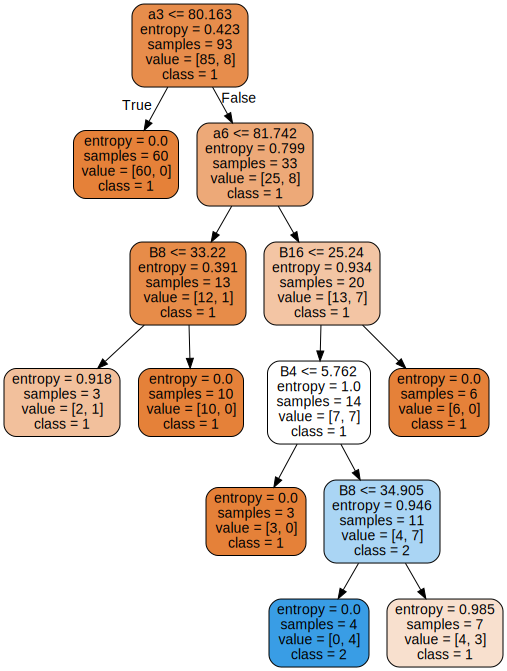

In [41]:
feature_name = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'B1', 'B2', 'B3','B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13','B14', 'B15', 'B16', 'B17']
class_name=["1","2","3"]
import graphviz
dot_data = tree.export_graphviz(clf
                               ,feature_names= feature_name
                               ,class_names=class_name
                               ,filled=True
                               ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
df = pd.read_csv('pinpai3.csv')
data = df.iloc[:,3:-1]
target = df.iloc[:,-1]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data,target,test_size=0.3)
clf = RandomForestClassifier()
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest) #返回预测的准确度
score

0.926829268292683

In [43]:
# 得到特征重要性
feature_list=data.columns
importances = list(clf.feature_importances_)  
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)] 
print(type(feature_importances))
# 排序-降序，key参数决定按哪一列进行排序，lambda函数确定出按第二列排序
feature_importances = sorted(feature_importances, key =lambda x:x[1], reverse = True)
print(feature_importances)
# 对应进行打印
[print('Variable: {}         Importance: {}'.format(*pair)) for pair in feature_importances]

<class 'list'>
[('a2', 0.1884), ('a1', 0.0967), ('a3', 0.0733), ('a6', 0.0721), ('a5', 0.0683), ('a4', 0.0674), ('B16', 0.0649), ('B10', 0.0429), ('a8', 0.0374), ('B6', 0.0349), ('B17', 0.0337), ('B13', 0.0306), ('B8', 0.0284), ('a7', 0.0271), ('B14', 0.0192), ('B12', 0.0186), ('B3', 0.0183), ('B2', 0.0173), ('B15', 0.0133), ('B4', 0.0117), ('B11', 0.0109), ('B5', 0.01), ('B9', 0.0074), ('B7', 0.0051), ('B1', 0.0023)]
Variable: a2         Importance: 0.1884
Variable: a1         Importance: 0.0967
Variable: a3         Importance: 0.0733
Variable: a6         Importance: 0.0721
Variable: a5         Importance: 0.0683
Variable: a4         Importance: 0.0674
Variable: B16         Importance: 0.0649
Variable: B10         Importance: 0.0429
Variable: a8         Importance: 0.0374
Variable: B6         Importance: 0.0349
Variable: B17         Importance: 0.0337
Variable: B13         Importance: 0.0306
Variable: B8         Importance: 0.0284
Variable: a7         Importance: 0.0271
Variable: B14 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

# 聚类

In [44]:
#随机森林
import pandas as pd
from sklearn.cluster import KMeans
df=pd.read_csv('pinpai1.csv')
df=df.iloc[:,3:]
data=df[['a1','B16','B17','a3','B14','B13','a2']]
model=KMeans(2).fit(data)
df['label']=model.labels_
print(df)
print(pd.Series(model.labels_).value_counts())
compare=df['购买意愿'].values==df.label.values
true=0
false=0
for i in compare:
    if i==True:
        true+=1
    else:
        false+=1
print('accuracy:',true/(true+false))

        a1     a2     a3     a4     a5     a6     a7     a8  B1  B2  ...  B10  \
0    71.68  72.41  74.05  69.92  80.84  75.23  73.20  77.34   2  30  ...    8   
1    88.92  90.18  88.92  88.88  88.87  88.88  90.98  88.87   2  12  ...   11   
2    67.26  67.10  66.69  70.34  69.73  69.74  73.52  66.66   2   5  ...    8   
3    93.53  90.94  73.90  88.88  90.65  94.17  95.60  96.65   2  29  ...    6   
4    89.65  93.95  73.90  96.30  88.87  96.92  95.60  95.88   2  29  ...    6   
..     ...    ...    ...    ...    ...    ...    ...    ...  ..  ..  ...  ...   
548  79.84  77.80  77.81  81.93  80.84  80.52  80.05  81.87   2  35  ...   12   
549  77.81  75.78  74.05  77.77  72.91  71.95  71.06  73.66   1   6  ...   10   
550  73.21  71.14  66.69  74.08  71.67  71.95  75.48  70.76   2  15  ...   10   
551  88.92  88.92  85.17  85.61  88.87  91.63  90.98  88.87   2  36  ...   13   
552  92.48  93.18  88.92  96.72  93.72  94.70  93.46  92.55   2  32  ...   10   

     B11  B12   B13  B14  B

In [45]:
#逻辑回归
import pandas as pd
from sklearn.cluster import KMeans
df=pd.read_csv('pinpai1.csv')
df=df.iloc[:,3:]
data=df[['B8','B10','B3','a1','B17','a3','B16']]
model=KMeans(2).fit(data)
df['label']=model.labels_
print(df)
print(pd.Series(model.labels_).value_counts())
compare=df['购买意愿'].values==df.label.values
true=0
false=0
for i in compare:
    if i==True:
        true+=1
    else:
        false+=1
print('accuracy:',true/(true+false))

        a1     a2     a3     a4     a5     a6     a7     a8  B1  B2  ...  B10  \
0    71.68  72.41  74.05  69.92  80.84  75.23  73.20  77.34   2  30  ...    8   
1    88.92  90.18  88.92  88.88  88.87  88.88  90.98  88.87   2  12  ...   11   
2    67.26  67.10  66.69  70.34  69.73  69.74  73.52  66.66   2   5  ...    8   
3    93.53  90.94  73.90  88.88  90.65  94.17  95.60  96.65   2  29  ...    6   
4    89.65  93.95  73.90  96.30  88.87  96.92  95.60  95.88   2  29  ...    6   
..     ...    ...    ...    ...    ...    ...    ...    ...  ..  ..  ...  ...   
548  79.84  77.80  77.81  81.93  80.84  80.52  80.05  81.87   2  35  ...   12   
549  77.81  75.78  74.05  77.77  72.91  71.95  71.06  73.66   1   6  ...   10   
550  73.21  71.14  66.69  74.08  71.67  71.95  75.48  70.76   2  15  ...   10   
551  88.92  88.92  85.17  85.61  88.87  91.63  90.98  88.87   2  36  ...   13   
552  92.48  93.18  88.92  96.72  93.72  94.70  93.46  92.55   2  32  ...   10   

     B11  B12   B13  B14  B

In [46]:
#xgboost
import pandas as pd
from sklearn.cluster import KMeans
df=pd.read_csv('pinpai1.csv')
df=df.iloc[:,3:]
data=df[['B17','B9','a3','B16','B13','B8','a1']]
model=KMeans(2).fit(data)
df['label']=model.labels_
print(df)
print(pd.Series(model.labels_).value_counts())
compare=df['购买意愿'].values==df.label.values
true=0
false=0
for i in compare:
    if i==True:
        true+=1
    else:
        false+=1
print('accuracy:',true/(true+false))

        a1     a2     a3     a4     a5     a6     a7     a8  B1  B2  ...  B10  \
0    71.68  72.41  74.05  69.92  80.84  75.23  73.20  77.34   2  30  ...    8   
1    88.92  90.18  88.92  88.88  88.87  88.88  90.98  88.87   2  12  ...   11   
2    67.26  67.10  66.69  70.34  69.73  69.74  73.52  66.66   2   5  ...    8   
3    93.53  90.94  73.90  88.88  90.65  94.17  95.60  96.65   2  29  ...    6   
4    89.65  93.95  73.90  96.30  88.87  96.92  95.60  95.88   2  29  ...    6   
..     ...    ...    ...    ...    ...    ...    ...    ...  ..  ..  ...  ...   
548  79.84  77.80  77.81  81.93  80.84  80.52  80.05  81.87   2  35  ...   12   
549  77.81  75.78  74.05  77.77  72.91  71.95  71.06  73.66   1   6  ...   10   
550  73.21  71.14  66.69  74.08  71.67  71.95  75.48  70.76   2  15  ...   10   
551  88.92  88.92  85.17  85.61  88.87  91.63  90.98  88.87   2  36  ...   13   
552  92.48  93.18  88.92  96.72  93.72  94.70  93.46  92.55   2  32  ...   10   

     B11  B12   B13  B14  B

In [47]:
#随机森林
import pandas as pd
from sklearn.cluster import KMeans
df=pd.read_csv('pinpai2.csv')
df=df.iloc[:,3:]
data=df[['B16','a1','B17','B15','a5','a3','a7','B13','a4','a2']]
model=KMeans(2).fit(data)
df['label']=model.labels_
print(df)
print(pd.Series(model.labels_).value_counts())
compare=df['购买意愿'].values==df.label.values
true=0
false=0
for i in compare:
    if i==True:
        true+=1
    else:
        false+=1
print('accuracy:',true/(true+false))

         a1     a2     a3     a4     a5     a6     a7     a8  B1  B2  ...  \
0     68.73  66.69  62.94  70.34  58.56  77.77  71.24  63.33   1  11  ...   
1     78.55  77.80  81.56  81.03  82.30  83.60  80.07  81.09   2  15  ...   
2     81.36  79.91  63.08  74.03  80.94  80.52  70.86  71.54   2  33  ...   
3     77.81  77.80  77.81  77.77  77.76  77.77  77.77  77.76   2  14  ...   
4     65.17  64.95  62.94  73.61  63.58  69.74  71.10  59.23   1  29  ...   
...     ...    ...    ...    ...    ...    ...    ...    ...  ..  ..  ...   
1261  55.58  55.58  55.58  55.55  53.77  55.56  55.56  55.55   2  28  ...   
1262  71.36  75.37  70.44  77.77  68.43  75.03  75.48  70.33   2  32  ...   
1263  99.04  99.03  99.03  99.98  99.98  99.99  99.99  99.98   2  36  ...   
1264  90.77  91.92  92.67  96.72  94.96  97.25  95.60  95.88   1  30  ...   
1265  82.43  88.51  74.05  93.03  76.46  94.70  91.16  95.88   1  15  ...   

      B10  B11  B12   B13  B14  B15  B16  B17  购买意愿  label  
0      11    4

In [48]:
#逻辑回归
import pandas as pd
from sklearn.cluster import KMeans
df=pd.read_csv('pinpai2.csv')
df=df.iloc[:,3:]
data=df[['B9','B8','B10','B5','B11','B1','B3','a1','B17']]
model=KMeans(2).fit(data)
df['label']=model.labels_
print(df)
print(pd.Series(model.labels_).value_counts())
compare=df['购买意愿'].values==df.label.values
true=0
false=0
for i in compare:
    if i==True:
        true+=1
    else:
        false+=1
print('accuracy:',true/(true+false))

         a1     a2     a3     a4     a5     a6     a7     a8  B1  B2  ...  \
0     68.73  66.69  62.94  70.34  58.56  77.77  71.24  63.33   1  11  ...   
1     78.55  77.80  81.56  81.03  82.30  83.60  80.07  81.09   2  15  ...   
2     81.36  79.91  63.08  74.03  80.94  80.52  70.86  71.54   2  33  ...   
3     77.81  77.80  77.81  77.77  77.76  77.77  77.77  77.76   2  14  ...   
4     65.17  64.95  62.94  73.61  63.58  69.74  71.10  59.23   1  29  ...   
...     ...    ...    ...    ...    ...    ...    ...    ...  ..  ..  ...   
1261  55.58  55.58  55.58  55.55  53.77  55.56  55.56  55.55   2  28  ...   
1262  71.36  75.37  70.44  77.77  68.43  75.03  75.48  70.33   2  32  ...   
1263  99.04  99.03  99.03  99.98  99.98  99.99  99.99  99.98   2  36  ...   
1264  90.77  91.92  92.67  96.72  94.96  97.25  95.60  95.88   1  30  ...   
1265  82.43  88.51  74.05  93.03  76.46  94.70  91.16  95.88   1  15  ...   

      B10  B11  B12   B13  B14  B15  B16  B17  购买意愿  label  
0      11    4

In [49]:
#xgboost
import pandas as pd
from sklearn.cluster import KMeans
df=pd.read_csv('pinpai2.csv')
df=df.iloc[:,3:]
data=df[['B16','B17','a3','a1','a8','B13','B6','a4','a5','B7']]
model=KMeans(2).fit(data)
df['label']=model.labels_
print(df)
print(pd.Series(model.labels_).value_counts())
compare=df['购买意愿'].values==df.label.values
true=0
false=0
for i in compare:
    if i==True:
        true+=1
    else:
        false+=1
print('accuracy:',true/(true+false))

         a1     a2     a3     a4     a5     a6     a7     a8  B1  B2  ...  \
0     68.73  66.69  62.94  70.34  58.56  77.77  71.24  63.33   1  11  ...   
1     78.55  77.80  81.56  81.03  82.30  83.60  80.07  81.09   2  15  ...   
2     81.36  79.91  63.08  74.03  80.94  80.52  70.86  71.54   2  33  ...   
3     77.81  77.80  77.81  77.77  77.76  77.77  77.77  77.76   2  14  ...   
4     65.17  64.95  62.94  73.61  63.58  69.74  71.10  59.23   1  29  ...   
...     ...    ...    ...    ...    ...    ...    ...    ...  ..  ..  ...   
1261  55.58  55.58  55.58  55.55  53.77  55.56  55.56  55.55   2  28  ...   
1262  71.36  75.37  70.44  77.77  68.43  75.03  75.48  70.33   2  32  ...   
1263  99.04  99.03  99.03  99.98  99.98  99.99  99.99  99.98   2  36  ...   
1264  90.77  91.92  92.67  96.72  94.96  97.25  95.60  95.88   1  30  ...   
1265  82.43  88.51  74.05  93.03  76.46  94.70  91.16  95.88   1  15  ...   

      B10  B11  B12   B13  B14  B15  B16  B17  购买意愿  label  
0      11    4

In [50]:
#随机森林
import pandas as pd
from sklearn.cluster import KMeans
df=pd.read_csv('pinpai3.csv')
df=df.iloc[:,3:]
data=df[['a2','B16','a5','a1','B15','a8','a6','a3','a7','B14']]
model=KMeans(2,init='random').fit(data)
df['label']=model.labels_
print(df)
print(pd.Series(model.labels_).value_counts())
compare=df['购买意愿'].values==df.label.values
true=0
false=0
for i in compare:
    if i==True:
        true+=1
    else:
        false+=1
print('accuracy:',true/(true+false))

        a1     a2     a3     a4     a5     a6     a7     a8  B1  B2  ...  B10  \
0    88.92  82.95  85.17  85.19  77.76  83.60  82.15  88.87   2  20  ...    5   
1    95.05  93.33  77.66  93.03  88.87  94.17  95.60  95.88   2  32  ...    9   
2    71.15  76.79  66.69  81.93  66.65  77.77  77.58  76.99   2  34  ...   10   
3    70.57  71.65  70.44  74.03  66.65  66.34  62.09  74.44   2  36  ...   13   
4    68.73  70.96  70.44  71.24  69.90  72.49  71.24  70.76   1  15  ...    9   
..     ...    ...    ...    ...    ...    ...    ...    ...  ..  ..  ...  ...   
129  79.66  79.83  77.81  81.03  77.82  77.77  80.05  81.44   2  27  ...    3   
130  70.57  65.62  63.08  73.61  69.79  69.95  71.18  69.21   2  32  ...   10   
131  66.69  75.03  55.58  74.50  74.69  69.74  64.31  66.66   1   8  ...    8   
132  67.42  62.42  62.94  66.66  60.34  71.95  59.93  66.66   2  10  ...   12   
133  68.54  72.49  62.94  55.55  57.32  55.56  64.57  62.55   2  12  ...    6   

     B11  B12   B13  B14  B

In [51]:
#逻辑回归
import pandas as pd
from sklearn.cluster import KMeans
df=pd.read_csv('pinpai3.csv')
df=df.iloc[:,3:]
data=df[['B8','a2','a7','B4','B6','B11','B5','B2','a3']]
model=KMeans(2,init='random').fit(data)
df['label']=model.labels_
print(df)
print(pd.Series(model.labels_).value_counts())
compare=df['购买意愿'].values==df.label.values
true=0
false=0
for i in compare:
    if i==True:
        true+=1
    else:
        false+=1
print('accuracy:',true/(true+false))

        a1     a2     a3     a4     a5     a6     a7     a8  B1  B2  ...  B10  \
0    88.92  82.95  85.17  85.19  77.76  83.60  82.15  88.87   2  20  ...    5   
1    95.05  93.33  77.66  93.03  88.87  94.17  95.60  95.88   2  32  ...    9   
2    71.15  76.79  66.69  81.93  66.65  77.77  77.58  76.99   2  34  ...   10   
3    70.57  71.65  70.44  74.03  66.65  66.34  62.09  74.44   2  36  ...   13   
4    68.73  70.96  70.44  71.24  69.90  72.49  71.24  70.76   1  15  ...    9   
..     ...    ...    ...    ...    ...    ...    ...    ...  ..  ..  ...  ...   
129  79.66  79.83  77.81  81.03  77.82  77.77  80.05  81.44   2  27  ...    3   
130  70.57  65.62  63.08  73.61  69.79  69.95  71.18  69.21   2  32  ...   10   
131  66.69  75.03  55.58  74.50  74.69  69.74  64.31  66.66   1   8  ...    8   
132  67.42  62.42  62.94  66.66  60.34  71.95  59.93  66.66   2  10  ...   12   
133  68.54  72.49  62.94  55.55  57.32  55.56  64.57  62.55   2  12  ...    6   

     B11  B12   B13  B14  B

In [52]:
#xgboost
import pandas as pd
from sklearn.cluster import KMeans
df=pd.read_csv('pinpai3.csv')
df=df.iloc[:,3:]
data=df[['a2','a3','B16','B13','a8','B2','B8','B10','B17']]
model=KMeans(2,init='random').fit(data)
df['label']=model.labels_
print(df)
print(pd.Series(model.labels_).value_counts())
compare=df['购买意愿'].values==df.label.values
true=0
false=0
for i in compare:
    if i==True:
        true+=1
    else:
        false+=1
print('accuracy:',true/(true+false))

        a1     a2     a3     a4     a5     a6     a7     a8  B1  B2  ...  B10  \
0    88.92  82.95  85.17  85.19  77.76  83.60  82.15  88.87   2  20  ...    5   
1    95.05  93.33  77.66  93.03  88.87  94.17  95.60  95.88   2  32  ...    9   
2    71.15  76.79  66.69  81.93  66.65  77.77  77.58  76.99   2  34  ...   10   
3    70.57  71.65  70.44  74.03  66.65  66.34  62.09  74.44   2  36  ...   13   
4    68.73  70.96  70.44  71.24  69.90  72.49  71.24  70.76   1  15  ...    9   
..     ...    ...    ...    ...    ...    ...    ...    ...  ..  ..  ...  ...   
129  79.66  79.83  77.81  81.03  77.82  77.77  80.05  81.44   2  27  ...    3   
130  70.57  65.62  63.08  73.61  69.79  69.95  71.18  69.21   2  32  ...   10   
131  66.69  75.03  55.58  74.50  74.69  69.74  64.31  66.66   1   8  ...    8   
132  67.42  62.42  62.94  66.66  60.34  71.95  59.93  66.66   2  10  ...   12   
133  68.54  72.49  62.94  55.55  57.32  55.56  64.57  62.55   2  12  ...    6   

     B11  B12   B13  B14  B

# 关联分析

In [53]:
import pandas as pd
x=pd.read_csv('pinpai1.csv')
x=x.iloc[:,2:].T
# 1、数据均值化处理
x_mean=x.mean(axis=1)
for i in range(x.index.size):
    x.iloc[i,:] = x.iloc[i,:]/x_mean[i]
# 2、提取参考队列和比较队列
ck=x.iloc[-1,:]
cp=x.iloc[:-1,:]
# 比较队列与参考队列相减
t=pd.DataFrame()
for j in range(cp.index.size):
    temp=pd.Series(cp.iloc[j,:]-ck)
    t=t.append(temp,ignore_index=True)
#求最大差和最小差
mmax=t.abs().max().max()
mmin=t.abs().min().min()
rho=0.5
#3、求关联系数
ksi=((mmin+rho*mmax)/(abs(t)+rho*mmax))
#4、求关联度
r=ksi.sum(axis=1)/ksi.columns.size
#5、关联度排序，得到结果r3>r2>r1
result=r.sort_values(ascending=False)
print('品牌一:\n',result)

品牌一:
 23    0.905519
25    0.905475
22    0.905272
15    0.905112
10    0.904904
20    0.904865
12    0.904671
21    0.904222
24    0.904142
18    0.904060
11    0.903832
19    0.903812
13    0.903543
3     0.903543
9     0.903479
1     0.903467
2     0.903417
8     0.903412
6     0.903410
7     0.903391
4     0.903389
5     0.903387
14    0.903384
17    0.903218
16    0.903146
0     0.903070
dtype: float64


In [54]:
import pandas as pd
x=pd.read_csv('pinpai2.csv')
x=x.iloc[:,2:].T
# 1、数据均值化处理
x_mean=x.mean(axis=1)
for i in range(x.index.size):
    x.iloc[i,:] = x.iloc[i,:]/x_mean[i]
# 2、提取参考队列和比较队列
ck=x.iloc[-1,:]
cp=x.iloc[:-1,:]
# 比较队列与参考队列相减
t=pd.DataFrame()
for j in range(cp.index.size):
    temp=pd.Series(cp.iloc[j,:]-ck)
    t=t.append(temp,ignore_index=True)
#求最大差和最小差
mmax=t.abs().max().max()
mmin=t.abs().min().min()
rho=0.5
#3、求关联系数
ksi=((mmin+rho*mmax)/(abs(t)+rho*mmax))
#4、求关联度
r=ksi.sum(axis=1)/ksi.columns.size
#5、关联度排序，得到结果r3>r2>r1
result=r.sort_values(ascending=False)
print('品牌二:\n',result)

品牌二:
 25    0.883214
15    0.882102
22    0.881803
23    0.881785
10    0.880810
21    0.880685
20    0.880480
12    0.879957
19    0.879613
18    0.879488
24    0.879476
11    0.879042
3     0.878823
9     0.878803
13    0.878789
5     0.878724
1     0.878723
14    0.878701
2     0.878663
4     0.878655
7     0.878653
8     0.878624
6     0.878618
16    0.878147
17    0.878127
0     0.878036
dtype: float64


In [55]:
import pandas as pd
x=pd.read_csv('pinpai3.csv')
x=x.iloc[:,2:].T
# 1、数据均值化处理
x_mean=x.mean(axis=1)
for i in range(x.index.size):
    x.iloc[i,:] = x.iloc[i,:]/x_mean[i]
# 2、提取参考队列和比较队列
ck=x.iloc[-1,:]
cp=x.iloc[:-1,:]
# 比较队列与参考队列相减
t=pd.DataFrame()
for j in range(cp.index.size):
    temp=pd.Series(cp.iloc[j,:]-ck)
    t=t.append(temp,ignore_index=True)
#求最大差和最小差
mmax=t.abs().max().max()
mmin=t.abs().min().min()
rho=0.5
#3、求关联系数
ksi=((mmin+rho*mmax)/(abs(t)+rho*mmax))
#4、求关联度
r=ksi.sum(axis=1)/ksi.columns.size
#5、关联度排序，得到结果r3>r2>r1
result=r.sort_values(ascending=False)
print('品牌三:\n',result)

品牌三:
 25    0.830295
10    0.824583
23    0.824459
15    0.823691
12    0.823635
24    0.822595
20    0.822185
22    0.821762
21    0.820818
11    0.820525
19    0.819839
3     0.819534
18    0.819452
2     0.819436
1     0.819411
9     0.819335
5     0.819311
6     0.819085
8     0.819014
4     0.818911
7     0.818699
13    0.818513
17    0.818318
14    0.818169
16    0.817476
0     0.817409
dtype: float64


# 第三问

In [56]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from collections import Counter
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve,roc_auc_score,confusion_matrix,make_scorer
df=pd.read_csv('pinpai1.csv')
df=df.iloc[:,3:]
df=df[['a1','a2','a3','a5','B14','B15','B16','B17','购买意愿']]
print(df)
print(df['购买意愿'].value_counts())
#数据集下采样再平衡（当一个类是另一个类8倍以上采用，可调）
df_x=df.loc[df['购买意愿']==0]
df_y=df.loc[df['购买意愿']==1]
new_df_x=resample(df_x,replace=False,n_samples=df_y.shape[0]*8)
df=pd.concat((new_df_x,df_y))
print(df['购买意愿'].value_counts())
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
sm=SMOTE()
x_train,y_train=sm.fit_resample(x_train,y_train)
print(Counter(y_train))

        a1     a2     a3     a5  B14  B15  B16  B17  购买意愿
0    71.68  72.41  74.05  80.84   13    9   40    8     0
1    88.92  90.18  88.92  88.87    7    7   25   25     0
2    67.26  67.10  66.69  69.73   10   15   10   10     0
3    93.53  90.94  73.90  90.65   11    7   15   30     0
4    89.65  93.95  73.90  88.87   15   12   15    0     0
..     ...    ...    ...    ...  ...  ...  ...  ...   ...
548  79.84  77.80  77.81  80.84    8   14   50   20     0
549  77.81  75.78  74.05  72.91   10   15    0    0     0
550  73.21  71.14  66.69  71.67   15   15    0    0     0
551  88.92  88.92  85.17  88.87    9   13   20   20     0
552  92.48  93.18  88.92  93.72   14   15    0   20     0

[553 rows x 9 columns]
0    531
1     22
Name: 购买意愿, dtype: int64
0    176
1     22
Name: 购买意愿, dtype: int64
Counter({0: 123, 1: 123})


# 模型一：逻辑回归

accuracy_logic 0.8666666666666667
[[46  7]
 [ 1  6]]
roc_auc 0.862533692722372
precision 0.46153846153846156
f1 0.6
recall 0.8571428571428571


F:\anaconda\envs\tensorflow1\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


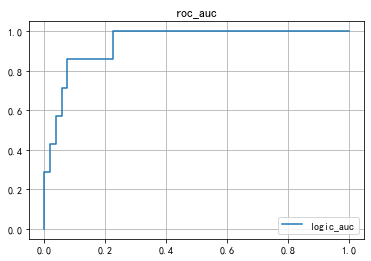

In [57]:
from sklearn.linear_model import LogisticRegression
model_logic=LogisticRegression()
model_logic.fit(x_train,y_train)
predict_logic=model_logic.predict(x_test)
print('accuracy_logic',accuracy_score(y_test,predict_logic))
print(confusion_matrix(y_test,predict_logic))
print('roc_auc',roc_auc_score(y_test,predict_logic))
print("precision",precision_score(y_test,predict_logic))
print("f1",f1_score(y_test,predict_logic))
print("recall",recall_score(y_test,predict_logic))
y_score=model_logic.predict_proba(x_test)[:,1]
fpr,tpr,_=roc_curve(y_test,y_score)
plt.plot(fpr,tpr,label="logic_auc")
plt.title('roc_auc')
plt.legend()
plt.grid()
plt.show()

# 模型二：决策树

accuracy_tree 0.9166666666666666
[[49  4]
 [ 1  6]]
roc_auc 0.8908355795148248
precision 0.6
f1 0.7058823529411764
recall 0.8571428571428571


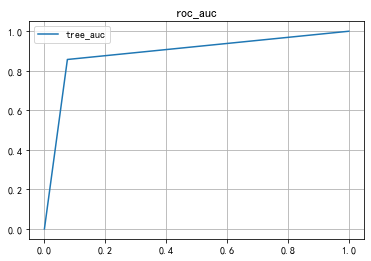

In [58]:
from sklearn import tree
model_tree=tree.DecisionTreeClassifier()
model_tree.fit(x_train,y_train)
predict_tree=model_tree.predict(x_test)
print('accuracy_tree',accuracy_score(y_test,predict_tree))
print(confusion_matrix(y_test,predict_tree))
print('roc_auc',roc_auc_score(y_test,predict_tree))
print("precision",precision_score(y_test,predict_tree))
print("f1",f1_score(y_test,predict_tree))
print("recall",recall_score(y_test,predict_tree))
y_score=model_tree.predict_proba(x_test)[:,1]
fpr,tpr,_=roc_curve(y_test,y_score)
plt.plot(fpr,tpr,label="tree_auc")
plt.title('roc_auc')
plt.legend()
plt.grid()
plt.show()

# 模型三：随机森林

accuracy_rf 0.95
[[52  1]
 [ 2  5]]
roc_auc 0.8477088948787063
precision 0.8333333333333334
f1 0.7692307692307692
recall 0.7142857142857143


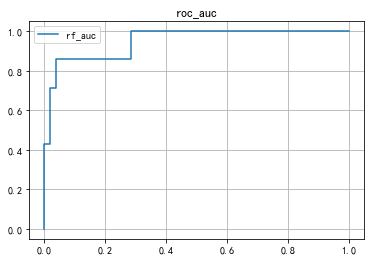

In [59]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier()
model_rf.fit(x_train,y_train)
predict_rf=model_rf.predict(x_test)
print('accuracy_rf',accuracy_score(y_test,predict_rf))
print(confusion_matrix(y_test,predict_rf))
print('roc_auc',roc_auc_score(y_test,predict_rf))
print("precision",precision_score(y_test,predict_rf))
print("f1",f1_score(y_test,predict_rf))
print("recall",recall_score(y_test,predict_rf))
y_score=model_rf.predict_proba(x_test)[:,1]
fpr,tpr,_=roc_curve(y_test,y_score)
plt.plot(fpr,tpr,label="rf_auc")
plt.title('roc_auc')
plt.legend()
plt.grid()
plt.show()

# 模型四：贝叶斯分类

accuracy_bayes 0.9666666666666667
[[51  2]
 [ 0  7]]
roc_auc 0.9811320754716981
precision 0.7777777777777778
f1 0.8750000000000001
recall 1.0


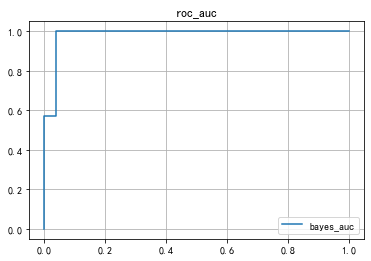

In [60]:
from sklearn.naive_bayes import GaussianNB
model_bayes=GaussianNB()
model_bayes.fit(x_train,y_train)
predict_bayes=model_bayes.predict(x_test)
print('accuracy_bayes',accuracy_score(y_test,predict_bayes))
print(confusion_matrix(y_test,predict_bayes))
print('roc_auc',roc_auc_score(y_test,predict_bayes))
print("precision",precision_score(y_test,predict_bayes))
print("f1",f1_score(y_test,predict_bayes))
print("recall",recall_score(y_test,predict_bayes))
y_score=model_bayes.predict_proba(x_test)[:,1]
fpr,tpr,_=roc_curve(y_test,y_score)
plt.plot(fpr,tpr,label="bayes_auc")
plt.title('roc_auc')
plt.legend()
plt.grid()
plt.show()

# 模型五：k近邻

accuracy_knn 0.9333333333333333
[[49  4]
 [ 0  7]]
roc_auc 0.9622641509433962
precision 0.6363636363636364
f1 0.7777777777777778
recall 1.0


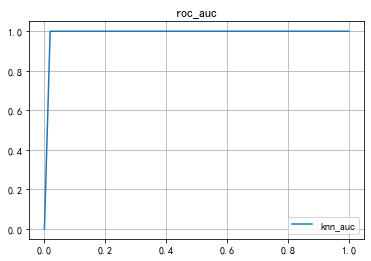

In [61]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier()
model_knn.fit(x_train,y_train)
predict_knn=model_knn.predict(x_test)
print('accuracy_knn',accuracy_score(y_test,predict_knn))
print(confusion_matrix(y_test,predict_knn))
print('roc_auc',roc_auc_score(y_test,predict_knn))
print("precision",precision_score(y_test,predict_knn))
print("f1",f1_score(y_test,predict_knn))
print("recall",recall_score(y_test,predict_knn))
y_score=model_knn.predict_proba(x_test)[:,1]
fpr,tpr,_=roc_curve(y_test,y_score)
plt.plot(fpr,tpr,label="knn_auc")
plt.title('roc_auc')
plt.legend()
plt.grid()
plt.show()

# 模型六：集成串行学习算法adaboost

accuracy_adaboost 0.9
[[50  3]
 [ 3  4]]
roc_auc 0.7574123989218329
precision 0.5714285714285714
f1 0.5714285714285714
recall 0.5714285714285714


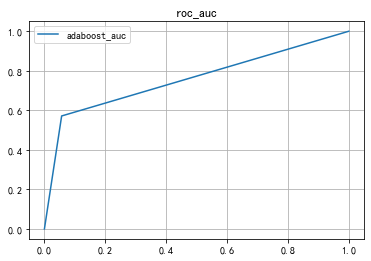

In [62]:
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
model_adaboost=tree.DecisionTreeClassifier()
model_adaboost=AdaBoostClassifier(base_estimator=model_adaboost,n_estimators=100)#基分类器，优化提升次数，学习率
model_adaboost.fit(x_train,y_train)
predict_adaboost=model_adaboost.predict(x_test)
print('accuracy_adaboost',accuracy_score(y_test,predict_adaboost))
print(confusion_matrix(y_test,predict_adaboost))
print('roc_auc',roc_auc_score(y_test,predict_adaboost))
print("precision",precision_score(y_test,predict_adaboost))
print("f1",f1_score(y_test,predict_adaboost))
print("recall",recall_score(y_test,predict_adaboost))
y_score=model_adaboost.predict_proba(x_test)[:,1]
fpr,tpr,_=roc_curve(y_test,y_score)
plt.plot(fpr,tpr,label="adaboost_auc")
plt.title('roc_auc')
plt.legend()
plt.grid()
plt.show()

# 模型七：梯度提升法

accuracy_gbboost 0.9333333333333333
[[50  3]
 [ 1  6]]
roc_auc 0.9002695417789758
precision 0.6666666666666666
f1 0.75
recall 0.8571428571428571


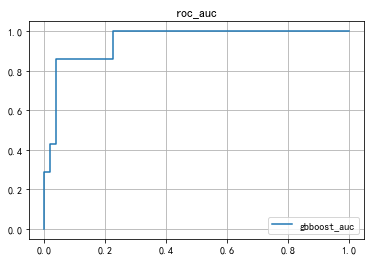

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbboost=GradientBoostingClassifier()
model_gbboost.fit(x_train,y_train)
predict_gbboost=model_gbboost.predict(x_test)
print('accuracy_gbboost',accuracy_score(y_test,predict_gbboost))
print(confusion_matrix(y_test,predict_gbboost))
print('roc_auc',roc_auc_score(y_test,predict_gbboost))
print("precision",precision_score(y_test,predict_gbboost))
print("f1",f1_score(y_test,predict_gbboost))
print("recall",recall_score(y_test,predict_gbboost))
y_score=model_gbboost.predict_proba(x_test)[:,1]
fpr,tpr,_=roc_curve(y_test,y_score)
plt.plot(fpr,tpr,label="gbboost_auc")
plt.title('roc_auc')
plt.legend()
plt.grid()
plt.show()

# 模型八：集成学习并行学习器bagging

accuracy_bag 0.8833333333333333
[[50  3]
 [ 4  3]]
roc_auc 0.6859838274932615
precision 0.5
f1 0.4615384615384615
recall 0.42857142857142855


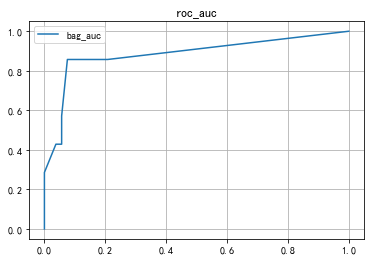

In [64]:
from sklearn.ensemble import BaggingClassifier
model_bag=BaggingClassifier()
model_bag.fit(x_train,y_train)
predict_bag=model_bag.predict(x_test)
print('accuracy_bag',accuracy_score(y_test,predict_bag))
print(confusion_matrix(y_test,predict_bag))
print('roc_auc',roc_auc_score(y_test,predict_bag))
print("precision",precision_score(y_test,predict_bag))
print("f1",f1_score(y_test,predict_bag))
print("recall",recall_score(y_test,predict_bag))
y_score=model_bag.predict_proba(x_test)[:,1]
fpr,tpr,_=roc_curve(y_test,y_score)
plt.plot(fpr,tpr,label="bag_auc")
plt.title('roc_auc')
plt.legend()
plt.grid()
plt.show()

# 模型九：XGB算法

[16:13:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_xgb 0.9333333333333333
[[50  3]
 [ 1  6]]
roc_auc 0.9002695417789758
precision 0.6666666666666666
f1 0.75
recall 0.8571428571428571


F:\anaconda\envs\tensorflow1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


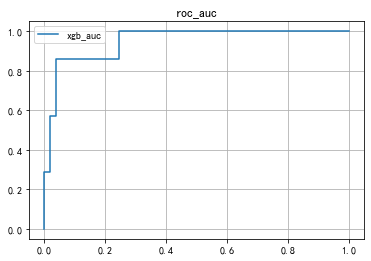

In [65]:
from xgboost import XGBClassifier
model_xgb=XGBClassifier()
model_xgb.fit(x_train,y_train)
predict_xgb=model_xgb.predict(x_test)
print('accuracy_xgb',accuracy_score(y_test,predict_xgb))
print(confusion_matrix(y_test,predict_xgb))
print('roc_auc',roc_auc_score(y_test,predict_xgb))
print("precision",precision_score(y_test,predict_xgb))
print("f1",f1_score(y_test,predict_xgb))
print("recall",recall_score(y_test,predict_xgb))
y_score=model_xgb.predict_proba(x_test)[:,1]
fpr,tpr,_=roc_curve(y_test,y_score)
plt.plot(fpr,tpr,label="xgb_auc")
plt.title('roc_auc')
plt.legend()
plt.grid()
plt.show()

# 模型十：LGBM法

accuracy_lgbm 0.9166666666666666
[[50  3]
 [ 2  5]]
roc_auc 0.8288409703504044
precision 0.625
f1 0.6666666666666666
recall 0.7142857142857143


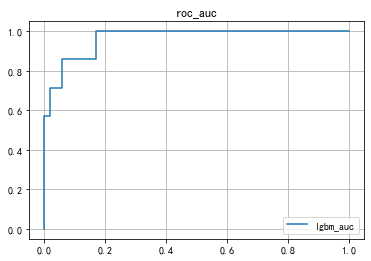

In [66]:
from lightgbm import LGBMClassifier
model_lgbm=LGBMClassifier()
model_lgbm.fit(x_train,y_train)
predict_lgbm=model_lgbm.predict(x_test)
print('accuracy_lgbm',accuracy_score(y_test,predict_lgbm))
print(confusion_matrix(y_test,predict_lgbm))
print('roc_auc',roc_auc_score(y_test,predict_lgbm))
print("precision",precision_score(y_test,predict_lgbm))
print("f1",f1_score(y_test,predict_lgbm))
print("recall",recall_score(y_test,predict_lgbm))
y_score=model_lgbm.predict_proba(x_test)[:,1]
fpr,tpr,_=roc_curve(y_test,y_score)
plt.plot(fpr,tpr,label="lgbm_auc")
plt.title('roc_auc')
plt.legend()
plt.grid()
plt.show()

# 模型十一：catboost法

Learning rate set to 0.005661
0:	learn: 0.6860215	total: 148ms	remaining: 2m 28s
1:	learn: 0.6753900	total: 150ms	remaining: 1m 14s
2:	learn: 0.6668598	total: 151ms	remaining: 50.3s
3:	learn: 0.6585201	total: 153ms	remaining: 38s
4:	learn: 0.6509813	total: 154ms	remaining: 30.6s
5:	learn: 0.6431934	total: 155ms	remaining: 25.7s
6:	learn: 0.6354896	total: 157ms	remaining: 22.2s
7:	learn: 0.6279731	total: 158ms	remaining: 19.6s
8:	learn: 0.6218142	total: 160ms	remaining: 17.6s
9:	learn: 0.6141501	total: 162ms	remaining: 16s
10:	learn: 0.6066638	total: 163ms	remaining: 14.7s
11:	learn: 0.6005581	total: 164ms	remaining: 13.5s
12:	learn: 0.5918466	total: 166ms	remaining: 12.6s
13:	learn: 0.5859823	total: 167ms	remaining: 11.8s
14:	learn: 0.5792712	total: 168ms	remaining: 11.1s
15:	learn: 0.5713010	total: 170ms	remaining: 10.4s
16:	learn: 0.5641351	total: 171ms	remaining: 9.88s
17:	learn: 0.5577012	total: 172ms	remaining: 9.39s
18:	learn: 0.5507005	total: 174ms	remaining: 8.97s
19:	learn: 0.

240:	learn: 0.0953017	total: 510ms	remaining: 1.61s
241:	learn: 0.0947576	total: 512ms	remaining: 1.6s
242:	learn: 0.0943052	total: 513ms	remaining: 1.6s
243:	learn: 0.0938118	total: 516ms	remaining: 1.6s
244:	learn: 0.0933487	total: 518ms	remaining: 1.59s
245:	learn: 0.0928242	total: 519ms	remaining: 1.59s
246:	learn: 0.0923641	total: 521ms	remaining: 1.59s
247:	learn: 0.0920126	total: 522ms	remaining: 1.58s
248:	learn: 0.0916119	total: 524ms	remaining: 1.58s
249:	learn: 0.0911754	total: 525ms	remaining: 1.57s
250:	learn: 0.0908557	total: 526ms	remaining: 1.57s
251:	learn: 0.0902644	total: 528ms	remaining: 1.57s
252:	learn: 0.0898256	total: 529ms	remaining: 1.56s
253:	learn: 0.0894522	total: 531ms	remaining: 1.56s
254:	learn: 0.0890646	total: 532ms	remaining: 1.55s
255:	learn: 0.0885746	total: 534ms	remaining: 1.55s
256:	learn: 0.0880770	total: 535ms	remaining: 1.55s
257:	learn: 0.0876043	total: 536ms	remaining: 1.54s
258:	learn: 0.0871014	total: 538ms	remaining: 1.54s
259:	learn: 0.0

456:	learn: 0.0422694	total: 841ms	remaining: 999ms
457:	learn: 0.0421701	total: 843ms	remaining: 997ms
458:	learn: 0.0420504	total: 844ms	remaining: 995ms
459:	learn: 0.0419213	total: 846ms	remaining: 993ms
460:	learn: 0.0418016	total: 848ms	remaining: 991ms
461:	learn: 0.0416880	total: 849ms	remaining: 989ms
462:	learn: 0.0415309	total: 854ms	remaining: 990ms
463:	learn: 0.0414158	total: 858ms	remaining: 991ms
464:	learn: 0.0412890	total: 860ms	remaining: 989ms
465:	learn: 0.0411877	total: 863ms	remaining: 988ms
466:	learn: 0.0410405	total: 865ms	remaining: 987ms
467:	learn: 0.0409146	total: 867ms	remaining: 985ms
468:	learn: 0.0408092	total: 869ms	remaining: 984ms
469:	learn: 0.0407137	total: 870ms	remaining: 982ms
470:	learn: 0.0405712	total: 872ms	remaining: 979ms
471:	learn: 0.0404418	total: 874ms	remaining: 977ms
472:	learn: 0.0403130	total: 875ms	remaining: 975ms
473:	learn: 0.0402267	total: 877ms	remaining: 973ms
474:	learn: 0.0401089	total: 878ms	remaining: 971ms
475:	learn: 

659:	learn: 0.0254295	total: 1.17s	remaining: 602ms
660:	learn: 0.0253825	total: 1.17s	remaining: 600ms
661:	learn: 0.0253152	total: 1.17s	remaining: 598ms
662:	learn: 0.0252772	total: 1.17s	remaining: 597ms
663:	learn: 0.0252267	total: 1.18s	remaining: 595ms
664:	learn: 0.0251975	total: 1.18s	remaining: 593ms
665:	learn: 0.0251392	total: 1.18s	remaining: 591ms
666:	learn: 0.0250855	total: 1.18s	remaining: 589ms
667:	learn: 0.0250457	total: 1.18s	remaining: 587ms
668:	learn: 0.0249854	total: 1.18s	remaining: 585ms
669:	learn: 0.0249353	total: 1.18s	remaining: 584ms
670:	learn: 0.0249018	total: 1.19s	remaining: 582ms
671:	learn: 0.0248476	total: 1.19s	remaining: 580ms
672:	learn: 0.0248054	total: 1.19s	remaining: 578ms
673:	learn: 0.0247574	total: 1.19s	remaining: 576ms
674:	learn: 0.0247164	total: 1.19s	remaining: 574ms
675:	learn: 0.0246542	total: 1.19s	remaining: 572ms
676:	learn: 0.0245723	total: 1.2s	remaining: 571ms
677:	learn: 0.0244946	total: 1.2s	remaining: 569ms
678:	learn: 0.

863:	learn: 0.0171934	total: 1.5s	remaining: 236ms
864:	learn: 0.0171633	total: 1.5s	remaining: 234ms
865:	learn: 0.0171428	total: 1.5s	remaining: 232ms
866:	learn: 0.0171055	total: 1.5s	remaining: 230ms
867:	learn: 0.0170810	total: 1.5s	remaining: 229ms
868:	learn: 0.0170483	total: 1.5s	remaining: 227ms
869:	learn: 0.0170197	total: 1.51s	remaining: 225ms
870:	learn: 0.0169886	total: 1.51s	remaining: 223ms
871:	learn: 0.0169696	total: 1.51s	remaining: 222ms
872:	learn: 0.0169506	total: 1.51s	remaining: 220ms
873:	learn: 0.0169236	total: 1.51s	remaining: 218ms
874:	learn: 0.0168947	total: 1.51s	remaining: 216ms
875:	learn: 0.0168565	total: 1.52s	remaining: 215ms
876:	learn: 0.0168301	total: 1.52s	remaining: 213ms
877:	learn: 0.0168077	total: 1.52s	remaining: 211ms
878:	learn: 0.0167829	total: 1.52s	remaining: 209ms
879:	learn: 0.0167453	total: 1.52s	remaining: 208ms
880:	learn: 0.0167239	total: 1.52s	remaining: 206ms
881:	learn: 0.0166956	total: 1.53s	remaining: 204ms
882:	learn: 0.0166

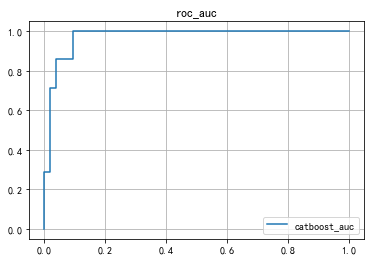

In [67]:
from catboost import CatBoostClassifier
model_catboost=CatBoostClassifier()
model_catboost.fit(x_train,y_train)
predict_catboost=model_catboost.predict(x_test)
print('accuracy_catboost',accuracy_score(y_test,predict_catboost))
print(confusion_matrix(y_test,predict_catboost))
print('roc_auc',roc_auc_score(y_test,predict_catboost))
print("precision",precision_score(y_test,predict_catboost))
print("f1",f1_score(y_test,predict_catboost))
print("recall",recall_score(y_test,predict_catboost))
y_score=model_catboost.predict_proba(x_test)[:,1]
fpr,tpr,_=roc_curve(y_test,y_score)
plt.plot(fpr,tpr,label="catboost_auc")
plt.title('roc_auc')
plt.legend()
plt.grid()
plt.show()

# 模型十二：svm支持向量机

accuracy_svm 0.8666666666666667
[[46  7]
 [ 1  6]]
0.862533692722372
precision 0.46153846153846156
f1 0.6
recall 0.8571428571428571


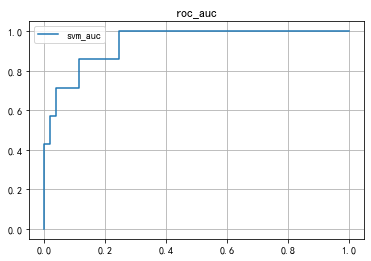

In [68]:
from sklearn import svm
model_svm=svm.SVC(kernel='linear',probability=True)
model_svm.fit(x_train,y_train)
predict_svm=model_svm.predict(x_test)
print('accuracy_svm',accuracy_score(y_test,predict_svm))
print(confusion_matrix(y_test,predict_svm))
print(roc_auc_score(y_test,predict_svm))
print("precision",precision_score(y_test,predict_svm))
print("f1",f1_score(y_test,predict_svm))
print("recall",recall_score(y_test,predict_svm))
y_score=model_svm.predict_proba(x_test)[:,1]
fpr,tpr,_=roc_curve(y_test,y_score)
plt.plot(fpr,tpr,label="svm_auc")
plt.title('roc_auc')
plt.legend()
plt.grid()
plt.show()

accuracy_svm 0.85
[[44  9]
 [ 0  7]]
0.9150943396226415
precision 0.4375
f1 0.6086956521739131
recall 1.0


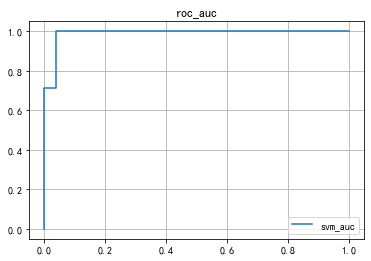

In [69]:
from sklearn import svm
model_svm=svm.SVC(kernel='rbf',probability=True)
model_svm.fit(x_train,y_train)
predict_svm=model_svm.predict(x_test)
print('accuracy_svm',accuracy_score(y_test,predict_svm))
print(confusion_matrix(y_test,predict_svm))
print(roc_auc_score(y_test,predict_svm))
print("precision",precision_score(y_test,predict_svm))
print("f1",f1_score(y_test,predict_svm))
print("recall",recall_score(y_test,predict_svm))
y_score=model_svm.predict_proba(x_test)[:,1]
fpr,tpr,_=roc_curve(y_test,y_score)
plt.plot(fpr,tpr,label="svm_auc")
plt.title('roc_auc')
plt.legend()
plt.grid()
plt.show()

accuracy_svm 0.8666666666666667
[[46  7]
 [ 1  6]]
0.862533692722372
precision 0.46153846153846156
f1 0.6
recall 0.8571428571428571


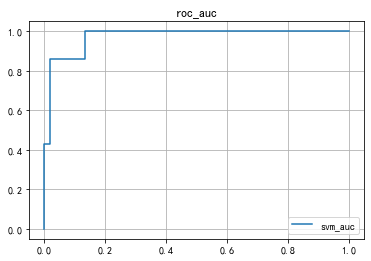

In [70]:
from sklearn import svm
model_svm=svm.SVC(kernel='poly',probability=True)
model_svm.fit(x_train,y_train)
predict_svm=model_svm.predict(x_test)
print('accuracy_svm',accuracy_score(y_test,predict_svm))
print(confusion_matrix(y_test,predict_svm))
print(roc_auc_score(y_test,predict_svm))
print("precision",precision_score(y_test,predict_svm))
print("f1",f1_score(y_test,predict_svm))
print("recall",recall_score(y_test,predict_svm))
y_score=model_svm.predict_proba(x_test)[:,1]
fpr,tpr,_=roc_curve(y_test,y_score)
plt.plot(fpr,tpr,label="svm_auc")
plt.title('roc_auc')
plt.legend()
plt.grid()
plt.show()

In [71]:
'''#MLP全连接神经网络
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix
import torch
import torch.nn as nn
import torch.utils.data as Data
import hiddenlayer as hl
from torchviz import make_dot
X_train_t = torch.from_numpy(x_train.astype(np.float32))
y_train_t = torch.from_numpy(y_train.astype(np.int64))
X_test_t = torch.from_numpy(x_test.astype(np.float32))
y_test_t = torch.from_numpy(y_test.astype(np.int64))
train_data = Data.TensorDataset(X_train_t,y_train_t)
train_loader = Data.DataLoader(dataset = train_data,batch_size=32,num_workers = 1)
class model(nn.Module):
    def __init__(self):
        super(model, self).__init__()
        self.hidden= nn.Sequential(
            nn.Linear(8,5),
            nn.ReLU(),
        )
        self.classifica = nn.Sequential(
            nn.Linear(5, 2),
            nn.Sigmoid()
        )
    def forward(self, x):
        x= self.hidden(x)
        x= self.classifica(x)
        return x
model = model()
print(model)
x = torch.randn(1,8).requires_grad_(True)
y = model(x)
Mymlpcvis = make_dot(y, params=dict(list(model.named_parameters()) + [('x', x)]))
#Mymlpcvis.view()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()
history1 = hl.History()
canvas1 = hl.Canvas()
print_step = 25
train_loss_all = 0
if __name__=='__main__':
    for epoch in range(15):
        for step, (b_x, b_y) in enumerate(train_loader):
            output = model(b_x)  # MLP在训练batch上的输出
            train_loss = loss_func(output, b_y)#计算损失
            optimizer.zero_grad()  # 每个迭代步的梯度初始化为0
            train_loss.backward()  # 损失的后向传播，计算梯度
            optimizer.step()  # 使用梯度进行优化
            niter = epoch * len(train_loader) + step + 1
            train_loss_all += train_loss
            if niter % print_step == 0:
                output =model(X_test_t)
                _, pre_lab = torch.max(output, 1)
                test_accuracy = accuracy_score(y_test_t, pre_lab)
                history1.log(niter, train_loss=train_loss / niter,test_accuracy=test_accuracy)
                with canvas1:
                    canvas1.draw_plot(history1["train_loss"])
                    canvas1.draw_plot(history1["test_accuracy"])
output =model(X_test_t)
_,pre_lab = torch.max(output,1)
test_accuracy = accuracy_score(y_test_t,pre_lab)
print("test_accuracy:",test_accuracy)
print(confusion_matrix(y_test_t,pre_lab))
'''

'#MLP全连接神经网络\nfrom sklearn.preprocessing import MinMaxScaler\nfrom sklearn.metrics import accuracy_score,confusion_matrix\nimport torch\nimport torch.nn as nn\nimport torch.utils.data as Data\nimport hiddenlayer as hl\nfrom torchviz import make_dot\nX_train_t = torch.from_numpy(x_train.astype(np.float32))\ny_train_t = torch.from_numpy(y_train.astype(np.int64))\nX_test_t = torch.from_numpy(x_test.astype(np.float32))\ny_test_t = torch.from_numpy(y_test.astype(np.int64))\ntrain_data = Data.TensorDataset(X_train_t,y_train_t)\ntrain_loader = Data.DataLoader(dataset = train_data,batch_size=32,num_workers = 1)\nclass model(nn.Module):\n    def __init__(self):\n        super(model, self).__init__()\n        self.hidden= nn.Sequential(\n            nn.Linear(8,5),\n            nn.ReLU(),\n        )\n        self.classifica = nn.Sequential(\n            nn.Linear(5, 2),\n            nn.Sigmoid()\n        )\n    def forward(self, x):\n        x= self.hidden(x)\n        x= self.classifica(x)\n    

# 模型优化一：随机森林

F:\anaconda\envs\tensorflow1\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.93897137 0.95346836 0.95949612 ...        nan        nan        nan]
  warnings.warn(
F:\anaconda\envs\tensorflow1\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the train scores are non-finite: [0.99598394 1.         1.         ...        nan        nan        nan]
  warnings.warn(
F:\anaconda\envs\tensorflow1\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.96747967 0.95934959 0.95934959 ...        nan        nan        nan]
  warnings.warn(
F:\anaconda\envs\tensorflow1\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the train scores are non-finite: [0.99593496 1.         1.         ...        nan        nan        nan]
  warnings.warn(
F:\anaconda\envs\tensorflow1\lib\site-packages\sklearn

{'max_depth': 5, 'max_features': 5, 'min_samples_split': 5, 'n_estimators': 30}
     pre_yes  pre_no
yes       50       3
no         1       6
accuracy 0.9333333333333333
precision 0.6666666666666666
f1 0.75
recall 0.8571428571428571
roc_auc 0.9002695417789758


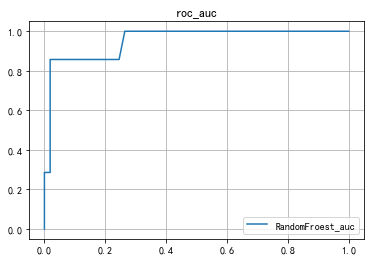

In [96]:
from sklearn.model_selection import GridSearchCV
model=RandomForestClassifier(criterion='entropy',oob_score=True)
param_grid={
    'min_samples_split':range(2,10),
    'n_estimators':[10,30,50,80,100,120,150],
    'max_depth':range(5,20),
    'max_features':range(5,20)
}
scorers={
    'precision_score':make_scorer(precision_score),
    'recall_score':make_scorer(recall_score),
    'accuracy_score':make_scorer(accuracy_score)
}
#这个参数可以自己调，模型默认使用训练结果最优参数重新训练
refit_score='precision_score'
grid_search=GridSearchCV(model,param_grid,refit=refit_score,cv=3,return_train_score=True,scoring=scorers,n_jobs=-1)
grid_search.fit(x_train,y_train)
y_pred=grid_search.predict(x_test)
print(grid_search.best_params_)
print(pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['pre_yes','pre_no'],index=['yes','no']))
print("accuracy",accuracy_score(y_test,y_pred))
print("precision",precision_score(y_test,y_pred))
print("f1",f1_score(y_test,y_pred))
print("recall",recall_score(y_test,y_pred))
print("roc_auc",roc_auc_score(y_test,y_pred))
y_score=grid_search.predict_proba(x_test)[:,1]
fpr,tpr,_=roc_curve(y_test,y_score)
plt.plot(fpr,tpr,label="RandomFroest_auc")
plt.title('roc_auc')
plt.legend()
plt.grid()
plt.show()

accuracy_rf 0.95
[[51  2]
 [ 1  6]]
roc_auc 0.9097035040431267
precision 0.75
f1 0.7999999999999999
recall 0.8571428571428571


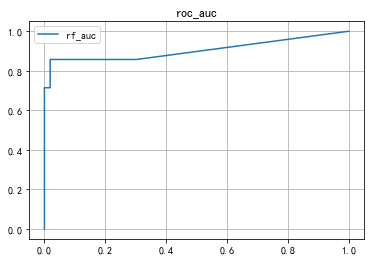

In [97]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(max_depth=16,max_features=5,min_samples_split=8,n_estimators=10)
model_rf.fit(x_train,y_train)
predict_rf=model_rf.predict(x_test)
print('accuracy_rf',accuracy_score(y_test,predict_rf))
print(confusion_matrix(y_test,predict_rf))
print('roc_auc',roc_auc_score(y_test,predict_rf))
print("precision",precision_score(y_test,predict_rf))
print("f1",f1_score(y_test,predict_rf))
print("recall",recall_score(y_test,predict_rf))
y_score=model_rf.predict_proba(x_test)[:,1]
fpr,tpr,_=roc_curve(y_test,y_score)
plt.plot(fpr,tpr,label="rf_auc")
plt.title('roc_auc')
plt.legend()
plt.grid()
plt.show()

# 模型优化二：逻辑回归

{'C': 10, 'penalty': 'l2'}
     pre_yes  pre_no
yes       46       7
no         1       6
accuracy 0.8666666666666667
precision 0.46153846153846156
f1 0.6
recall 0.8571428571428571
roc_auc 0.862533692722372


F:\anaconda\envs\tensorflow1\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.87144047        nan 0.918601          nan 0.93123254
        nan 0.91666667        nan 0.94533312        nan 0.95288248
        nan 0.94588683        nan 0.93863636        nan 0.94533312]
  warnings.warn(
F:\anaconda\envs\tensorflow1\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the train scores are non-finite: [       nan 0.90644365        nan 0.93819073        nan 0.95291511
        nan 0.95670934        nan 0.97613346        nan 0.97613346
        nan 0.97599807        nan 0.97594672        nan 0.97193303]
  warnings.warn(
F:\anaconda\envs\tensorflow1\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.98373984        nan 0.98373984        nan 0.97560976
        nan 0.98373984        nan 0.97560976        n

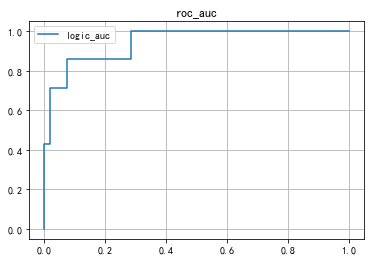

In [76]:
from sklearn.model_selection import GridSearchCV
model=LogisticRegression()
param_grid={
    'penalty': ['l1','l2'],
    'C':[0.001, 0.01,0.05, 0.1, 1, 10,50, 100, 1000]
}
scorers={
    'precision_score':make_scorer(precision_score),
    'recall_score':make_scorer(recall_score),
    'accuracy_score':make_scorer(accuracy_score)
}
#这个参数可以自己调，模型默认使用训练结果最优参数重新训练
refit_score='precision_score'
grid_search=GridSearchCV(model,param_grid,refit=refit_score,cv=3,return_train_score=True,scoring=scorers,n_jobs=-1)
grid_search.fit(x_train,y_train)
y_pred=grid_search.predict(x_test)
print(grid_search.best_params_)
print(pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['pre_yes','pre_no'],index=['yes','no']))
print("accuracy",accuracy_score(y_test,y_pred))
print("precision",precision_score(y_test,y_pred))
print("f1",f1_score(y_test,y_pred))
print("recall",recall_score(y_test,y_pred))
print("roc_auc",roc_auc_score(y_test,y_pred))
y_score=grid_search.predict_proba(x_test)[:,1]
fpr,tpr,_=roc_curve(y_test,y_score)
plt.plot(fpr,tpr,label="logic_auc")
plt.title('roc_auc')
plt.legend()
plt.grid()
plt.show()

accuracy_logic 0.8666666666666667
[[46  7]
 [ 1  6]]
roc_auc 0.862533692722372
precision 0.46153846153846156
f1 0.6
recall 0.8571428571428571


F:\anaconda\envs\tensorflow1\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


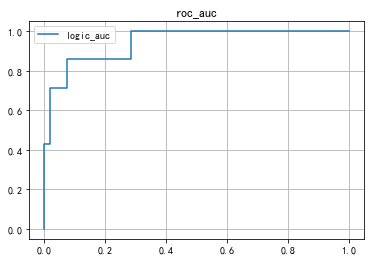

In [77]:
from sklearn.linear_model import LogisticRegression
model_logic=LogisticRegression(C= 10, penalty='l2')
model_logic.fit(x_train,y_train)
predict_logic=model_logic.predict(x_test)
print('accuracy_logic',accuracy_score(y_test,predict_logic))
print(confusion_matrix(y_test,predict_logic))
print('roc_auc',roc_auc_score(y_test,predict_logic))
print("precision",precision_score(y_test,predict_logic))
print("f1",f1_score(y_test,predict_logic))
print("recall",recall_score(y_test,predict_logic))
y_score=model_logic.predict_proba(x_test)[:,1]
fpr,tpr,_=roc_curve(y_test,y_score)
plt.plot(fpr,tpr,label="logic_auc")
plt.title('roc_auc')
plt.legend()
plt.grid()
plt.show()

# 模型优化三：XGB模型

F:\anaconda\envs\tensorflow1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:31:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'learning_rate': 0.04, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 45}
     pre_yes  pre_no
yes       50       3
no         1       6
accuracy 0.9333333333333333
precision 0.6666666666666666
f1 0.75
recall 0.8571428571428571
roc_auc 0.9002695417789758


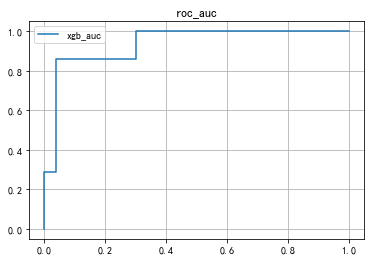

In [78]:
from sklearn.model_selection import GridSearchCV
model=XGBClassifier()
param_grid={
    'n_estimators': [5,10,15,20,25,30,35,40,45,50],
    'learning_rate':[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1],
    'max_depth':range(3,10),
    'min_child_weight':range(1,6)
}
scorers={
    'precision_score':make_scorer(precision_score),
    'recall_score':make_scorer(recall_score),
    'accuracy_score':make_scorer(accuracy_score)
}
#这个参数可以自己调，模型默认使用训练结果最优参数重新训练
refit_score='precision_score'
grid_search=GridSearchCV(model,param_grid,refit=refit_score,cv=3,return_train_score=True,scoring=scorers,n_jobs=-1)
grid_search.fit(x_train,y_train)
y_pred=grid_search.predict(x_test)
print(grid_search.best_params_)
print(pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['pre_yes','pre_no'],index=['yes','no']))
print("accuracy",accuracy_score(y_test,y_pred))
print("precision",precision_score(y_test,y_pred))
print("f1",f1_score(y_test,y_pred))
print("recall",recall_score(y_test,y_pred))
print("roc_auc",roc_auc_score(y_test,y_pred))
y_score=grid_search.predict_proba(x_test)[:,1]
fpr,tpr,_=roc_curve(y_test,y_score)
plt.plot(fpr,tpr,label="xgb_auc")
plt.title('roc_auc')
plt.legend()
plt.grid()
plt.show()

F:\anaconda\envs\tensorflow1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:31:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_xgb 0.9166666666666666
[[49  4]
 [ 1  6]]
roc_auc 0.8908355795148248
precision 0.6
f1 0.7058823529411764
recall 0.8571428571428571


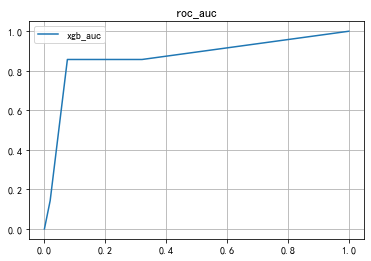

In [79]:
from xgboost import XGBClassifier
model_xgb=XGBClassifier(learning_rate= 0.01, max_depth= 3, min_child_weight= 5, n_estimators= 6)
model_xgb.fit(x_train,y_train)
predict_xgb=model_xgb.predict(x_test)
print('accuracy_xgb',accuracy_score(y_test,predict_xgb))
print(confusion_matrix(y_test,predict_xgb))
print('roc_auc',roc_auc_score(y_test,predict_xgb))
print("precision",precision_score(y_test,predict_xgb))
print("f1",f1_score(y_test,predict_xgb))
print("recall",recall_score(y_test,predict_xgb))
y_score=model_xgb.predict_proba(x_test)[:,1]
fpr,tpr,_=roc_curve(y_test,y_score)
plt.plot(fpr,tpr,label="xgb_auc")
plt.title('roc_auc')
plt.legend()
plt.grid()
plt.show()

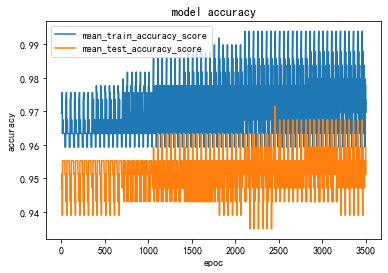

In [80]:
results=grid_search.cv_results_
plt.plot(results['mean_train_accuracy_score'],label='mean_train_accuracy_score')
plt.plot(results['mean_test_accuracy_score'],label='mean_test_accuracy_score')
plt.title('model accuracy')
plt.xlabel('epoc')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# 预测该类车

In [98]:
data=pd.read_csv('data1.csv')
print(data)
index=data[data.columns[1]]
print(index)
data=data.iloc[:,3:-1]
data=data[['a1','a2','a3','a5','B14','B15','B16','B17']]
data

   Unnamed: 0  客户编号  品牌编号      a1     a2     a3     a4     a5     a6     a7  \
0           0     1      1  89.84  87.65  88.92  88.88  88.87  91.63  99.99   
1           1     2      1  85.04  87.65  81.56  88.88  85.63  86.14  84.31   
2           2     3      1  76.29  74.61  66.69  88.88  66.65  77.77  71.24   
3           3     4      1  82.80  85.91  81.56  78.66  79.54  86.14  82.16   
4           4     5      1  88.92  91.35  88.92  88.88  88.87  88.88  91.16   

   ...  B9  B10  B11  B12  B13  B14  B15  B16  B17  是否会购买？  
0  ...   6    9    4    7   36   20   24    0    0     NaN  
1  ...   4    7    7    9   60   55   50   10   10     NaN  
2  ...   6    6    2    2   30   13   15   30   10     NaN  
3  ...   5   12    4    7   25   15   10   30   10     NaN  
4  ...   5   12    2    3   46   20   20    0   30     NaN  

[5 rows x 29 columns]
0    1
1    2
2    3
3    4
4    5
Name: 客户编号, dtype: int64


,a1,a2,a3,a5,B14,B15,B16,B17
0,89.84,87.65,88.92,88.87,20,24,0,0
1,85.04,87.65,81.56,85.63,55,50,10,10
2,76.29,74.61,66.69,66.65,13,15,30,10
3,82.80,85.91,81.56,79.54,15,10,30,10
4,88.92,91.35,88.92,88.87,20,20,0,30


In [99]:
predict_logic=model_logic.predict(data)
print(predict_logic)
pred1_logic=pd.DataFrame(predict_logic,index=index,columns=['是否会购买'])
pred1_logic.to_csv('pred1_logic.csv')
pred1_logic

[1 0 0 0 0]


,是否会购买
客户编号,
1,1
2,0
3,0
4,0
5,0


In [100]:
predict_rf=model_rf.predict(data)
print(predict_rf)
pred1_rf=pd.DataFrame(predict_rf,index=index,columns=['是否会购买'])
pred1_rf.to_csv('pred1_rf.csv')
pred1_rf

[1 0 0 0 0]


,是否会购买
客户编号,
1,1
2,0
3,0
4,0
5,0


In [101]:
predict_xgb=model_xgb.predict(data)
print(predict_xgb)
pred1_xgb=pd.DataFrame(predict_xgb,index=index,columns=['是否会购买'])
pred1_xgb.to_csv('pred1_xgb.csv')
pred1_xgb

[1 0 0 0 0]


F:\anaconda\envs\tensorflow1\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


,是否会购买
客户编号,
1,1
2,0
3,0
4,0
5,0


In [102]:
data=pd.read_csv('data2.csv')
print(data)
index=data[data.columns[1]]
print(index)
data=data.iloc[:,3:-1]
data=data[['a1','a2','a3','a5','B14','B15','B16','B17']]
data

   Unnamed: 0  客户编号  品牌编号      a1     a2     a3     a4     a5     a6     a7  \
0           5     6      2  88.92  84.50  81.56  84.72  79.54  83.06  80.05   
1           6     7      2  87.07  87.65  81.56  85.19  82.61  83.60  84.49   
2           7     8      2  82.80  83.24  77.81  85.61  84.02  83.60  82.15   
3           8     9      2  82.41  88.92  85.17  85.61  85.63  83.60  82.35   
4           9    10      2  68.54  59.23  55.58  62.97  57.32  61.38  68.95   

   ...  B9  B10  B11  B12  B13  B14  B15  B16  B17  是否会购买？  
0  ...   5   13    4    2   44   28   28    0    0     NaN  
1  ...   5    9    4    5   25   15   18   10    0     NaN  
2  ...   6   21    3    2   15    8   10   30   10     NaN  
3  ...   5   14    7    9   10    5    5   30   10     NaN  
4  ...   6    6    4    5   13   45   40    0    0     NaN  

[5 rows x 29 columns]
0     6
1     7
2     8
3     9
4    10
Name: 客户编号, dtype: int64


,a1,a2,a3,a5,B14,B15,B16,B17
0,88.92,84.50,81.56,79.54,28,28,0,0
1,87.07,87.65,81.56,82.61,15,18,10,0
2,82.80,83.24,77.81,84.02,8,10,30,10
3,82.41,88.92,85.17,85.63,5,5,30,10
4,68.54,59.23,55.58,57.32,45,40,0,0


In [103]:
predict_logic=model_logic.predict(data)
print(predict_logic)
pred2_logic=pd.DataFrame(predict_logic,index=index,columns=['是否会购买'])
pred2_logic.to_csv('pred2_logic.csv')
pred2_logic

[1 1 0 0 0]


,是否会购买
客户编号,
6,1
7,1
8,0
9,0
10,0


In [104]:
predict_rf=model_rf.predict(data)
print(predict_rf)
pred2_rf=pd.DataFrame(predict_rf,index=index,columns=['是否会购买'])
pred2_rf.to_csv('pred2_rf.csv')
pred2_rf

[1 1 0 0 0]


,是否会购买
客户编号,
6,1
7,1
8,0
9,0
10,0


In [105]:
predict_xgb=model_xgb.predict(data)
print(predict_xgb)
pred2_xgb=pd.DataFrame(predict_xgb,index=index,columns=['是否会购买'])
pred2_xgb.to_csv('pred2_xgb.csv')
pred2_xgb

[1 1 0 0 0]


F:\anaconda\envs\tensorflow1\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


,是否会购买
客户编号,
6,1
7,1
8,0
9,0
10,0


In [106]:
data=pd.read_csv('data3.csv')
print(data)
index=data[data.columns[1]]
print(index)
data=data.iloc[:,3:-1]
data=data[['a1','a2','a3','a5','B14','B15','B16','B17']]
data

   Unnamed: 0  客户编号  品牌编号      a1     a2     a3     a4     a5     a6     a7  \
0          10    11      3  88.80  82.63  81.56  81.03  80.84  75.03  80.05   
1          11    12      3  84.67  85.63  85.17  81.45  84.08  83.60  84.44   
2          12    13      3  99.04  99.03  99.03  99.98  99.98  99.99  99.99   
3          13    14      3  76.89  77.80  74.05  77.77  74.69  77.77  77.77   
4          14    15      3  83.58  81.09  70.44  81.45  74.69  80.85  75.43   

   ...  B9  B10  B11  B12  B13  B14  B15  B16  B17  是否会购买？  
0  ...   6   17    5    1   70   65   56    0    0     NaN  
1  ...   6    7    5    4   37   23   34    0    0     NaN  
2  ...   8    4    4    2   22    6    7   30   20     NaN  
3  ...   5   25    7    3   70   50   50    0    0     NaN  
4  ...   6   13    5    6   60   55   46    0    0     NaN  

[5 rows x 29 columns]
0    11
1    12
2    13
3    14
4    15
Name: 客户编号, dtype: int64


,a1,a2,a3,a5,B14,B15,B16,B17
0,88.80,82.63,81.56,80.84,65,56,0,0
1,84.67,85.63,85.17,84.08,23,34,0,0
2,99.04,99.03,99.03,99.98,6,7,30,20
3,76.89,77.80,74.05,74.69,50,50,0,0
4,83.58,81.09,70.44,74.69,55,46,0,0


In [107]:
predict_logic=model_logic.predict(data)
print(predict_logic)
pred3_logic=pd.DataFrame(predict_logic,index=index,columns=['是否会购买'])
pred3_logic.to_csv('pred3_logic.csv')
pred3_logic

[1 1 0 0 1]


,是否会购买
客户编号,
11,1
12,1
13,0
14,0
15,1


In [108]:
predict_rf=model_rf.predict(data)
print(predict_rf)
pred3_rf=pd.DataFrame(predict_rf,index=index,columns=['是否会购买'])
pred3_rf.to_csv('pred3_rf.csv')
pred3_rf

[1 1 0 0 1]


,是否会购买
客户编号,
11,1
12,1
13,0
14,0
15,1


In [109]:
predict_xgb=model_xgb.predict(data)
print(predict_xgb)
pred3_xgb=pd.DataFrame(predict_xgb,index=index,columns=['是否会购买'])
pred3_xgb.to_csv('pred3_xgb.csv')
pred3_xgb

[1 1 0 0 1]


F:\anaconda\envs\tensorflow1\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


,是否会购买
客户编号,
11,1
12,1
13,0
14,0
15,1
